# Driven Data (Pump it Up)

## Anchal Jaiswal

## Best Score: 0.8155 Rank: 495

### User Name: ajaiswal1008

# Importing libraries and datasets

In [688]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train=pd.read_csv("train_features.csv")
test=pd.read_csv("test_features.csv")
train_labels=pd.read_csv("train_values.csv")

# Cresting a copy of test 

In [689]:
test1=pd.read_csv("test_features.csv")

## Combining features with labels in the trainingg set

In [690]:
training=pd.concat([train,train_labels.status_group],axis=1)
training=training.drop("id",axis=1)
test=test.drop("id",axis=1)

### Combining train and test

In [691]:
combined=pd.concat([training,test],ignore_index=True)

## Checking Null Values

In [692]:
df_na=combined.isnull().sum()
print("There are",df_na[df_na!=0].count(),"columns with missing values listed below")
df_na[df_na!=0].sort_values(ascending=False)

There are 8 columns with missing values listed below


scheme_name          35258
status_group         14850
scheme_management     4846
installer             4532
funder                4504
public_meeting        4155
permit                3793
subvillage             470
dtype: int64

## Plotting the distribution of the features and the target variable

### Checking the number of unique values for each feature

In [693]:
for x in combined.columns:
    print(x,len(combined[x].unique()))

amount_tsh 102
basin 9
construction_year 55
date_recorded 369
district_code 20
extraction_type 18
extraction_type_class 7
extraction_type_group 13
funder 2141
gps_height 2456
installer 2411
latitude 71869
lga 125
longitude 71870
management 12
management_group 5
num_private 68
payment 7
payment_type 7
permit 3
population 1128
public_meeting 3
quality_group 6
quantity 5
quantity_group 5
recorded_by 1
region 21
region_code 27
scheme_management 13
scheme_name 2869
source 10
source_class 3
source_type 7
status_group 4
subvillage 21426
ward 2098
water_quality 8
waterpoint_type 7
waterpoint_type_group 6
wpt_name 45684


## Target variable

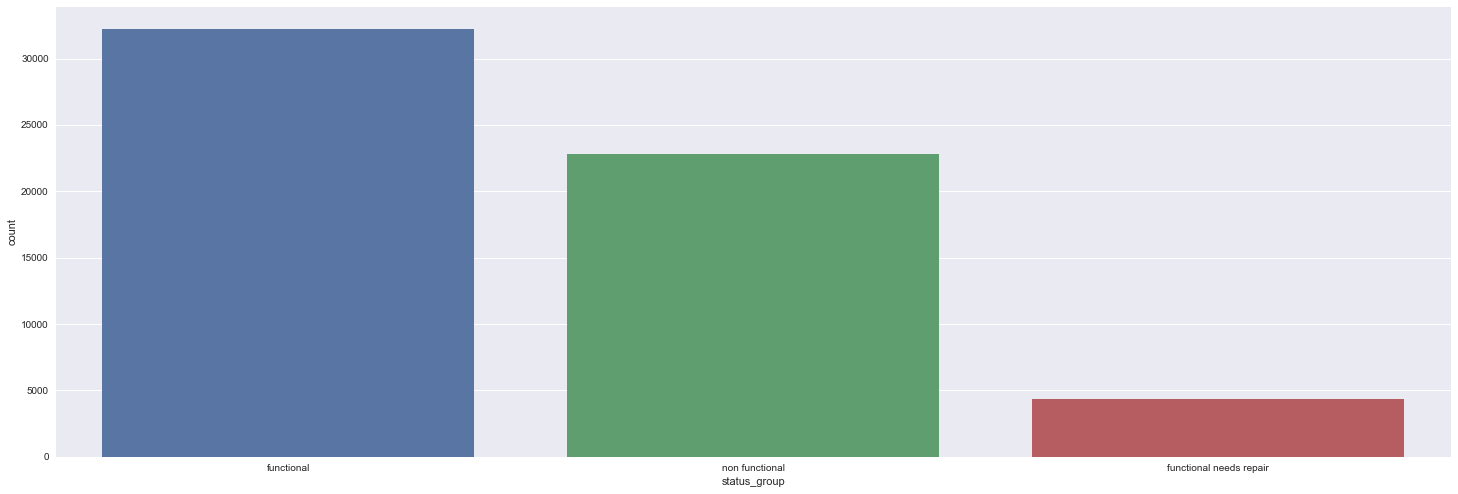

In [694]:
sns.countplot(combined.status_group)
plt.show()

#### Total Static Head

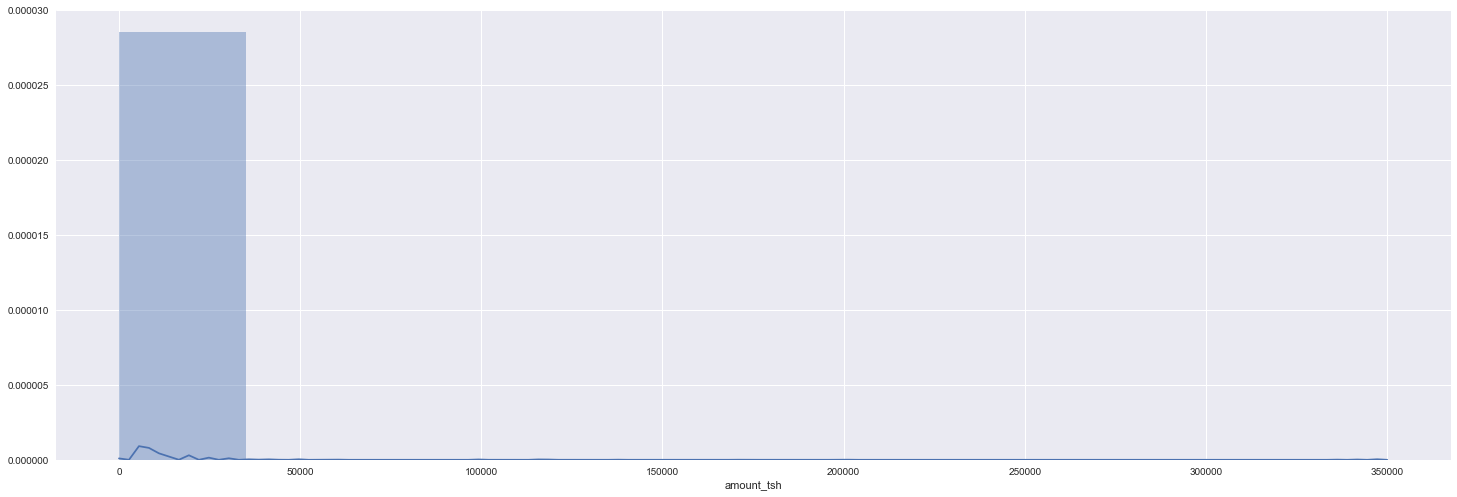

In [695]:
sns.set()
sns.set(rc={'figure.figsize':(25,8.27)})
sns.distplot(combined.amount_tsh,kde=True,bins=10)
plt.show()

In [579]:
combined.amount_tsh.mode()

0    0.0
dtype: float64

#### Most of the values in this variable is zero, so we convert it into a boolean representing whether amount is zero or not

In [696]:
combined['amount_tsh'] = combined.amount_tsh == 0

## Basin

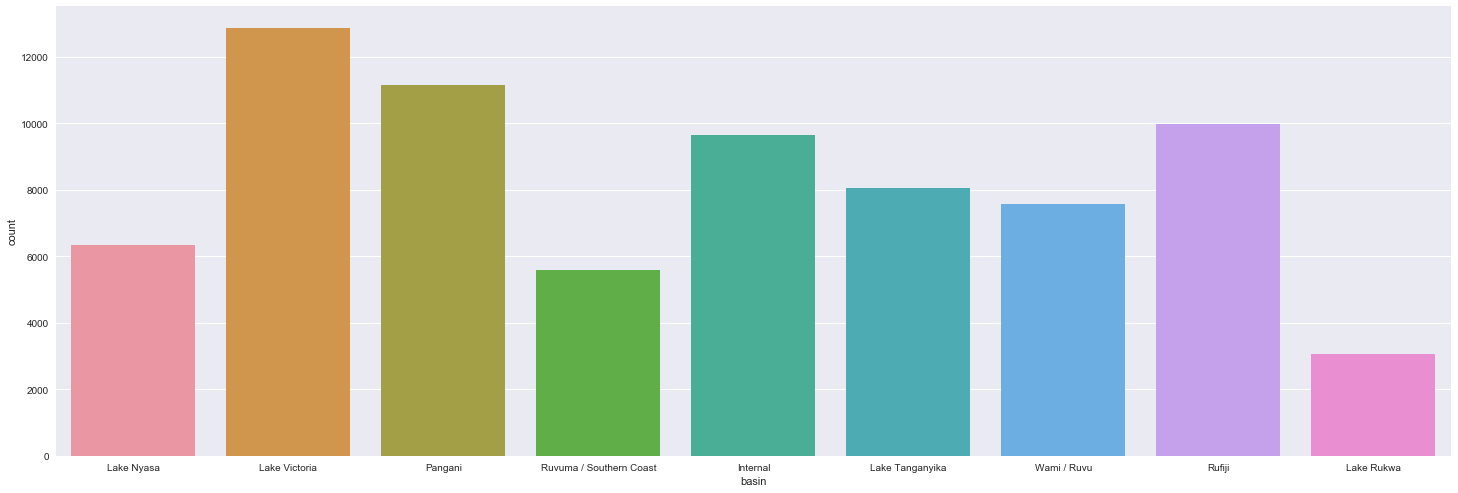

In [697]:
sns.countplot(combined.basin)
sns.set(rc={'figure.figsize':(25,8.27)})
plt.show()

In [698]:
vc=combined.basin.value_counts()
vc

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

### Lake victoria is the source for most number of wells in Tanzania

## Construction year

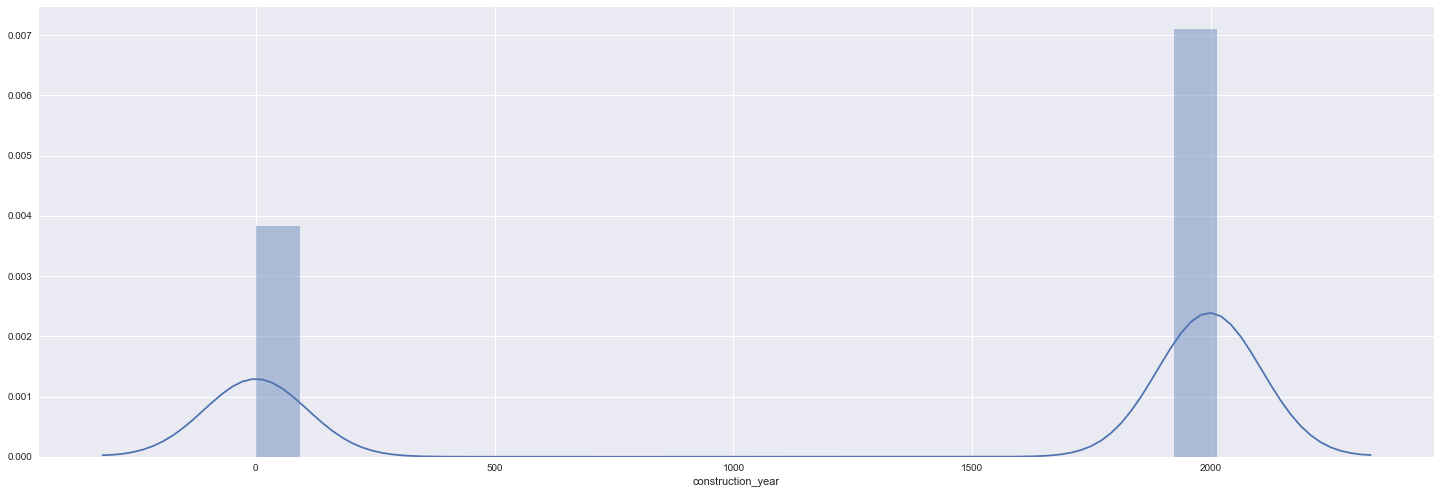

In [699]:
sns.set()
sns.distplot(combined.construction_year,kde=True)
plt.show()

#### Construction year is zero for a lot of variables therefore we will need to impute a different value for these data points

## Using KNN to impute construction year

In [701]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

### We select features that are related to construction year

In [702]:
combined["construction_year"]=combined["construction_year"].replace(0,np.nan)
df=combined[['region_code','scheme_management','management','construction_year']]
df=pd.get_dummies(df)
df1=df[df.construction_year.notnull()]
y=df1.construction_year
x=df1.drop("construction_year",axis=1)
x_test=df[df.construction_year.isnull()]
x_test=x_test.drop("construction_year",axis=1)

ind=x_test.index

In [703]:
cy=KNeighborsRegressor(n_neighbors=5)
cy.fit(x,y)
pred=cy.predict(x_test)

In [704]:
pr=pd.Series(pred,index=ind)
combined.loc[combined.construction_year.isnull(),'construction_year']=pr.round()

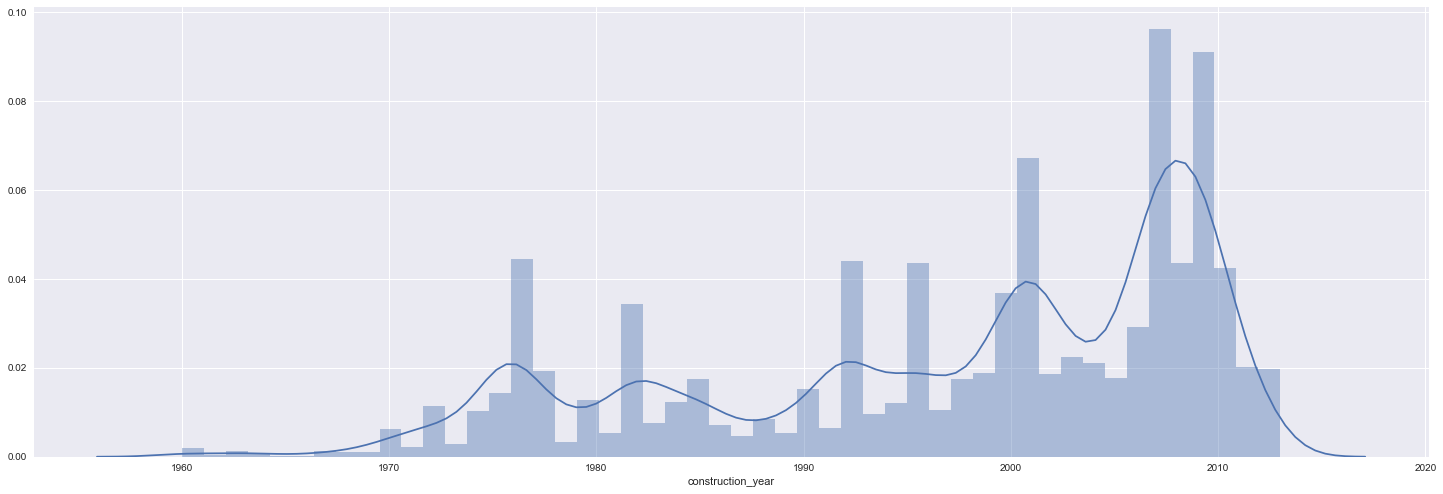

In [705]:
sns.set()
sns.distplot(combined.construction_year,kde=True)
plt.show()

## Date Recorded - We are only concerned about the year recorded

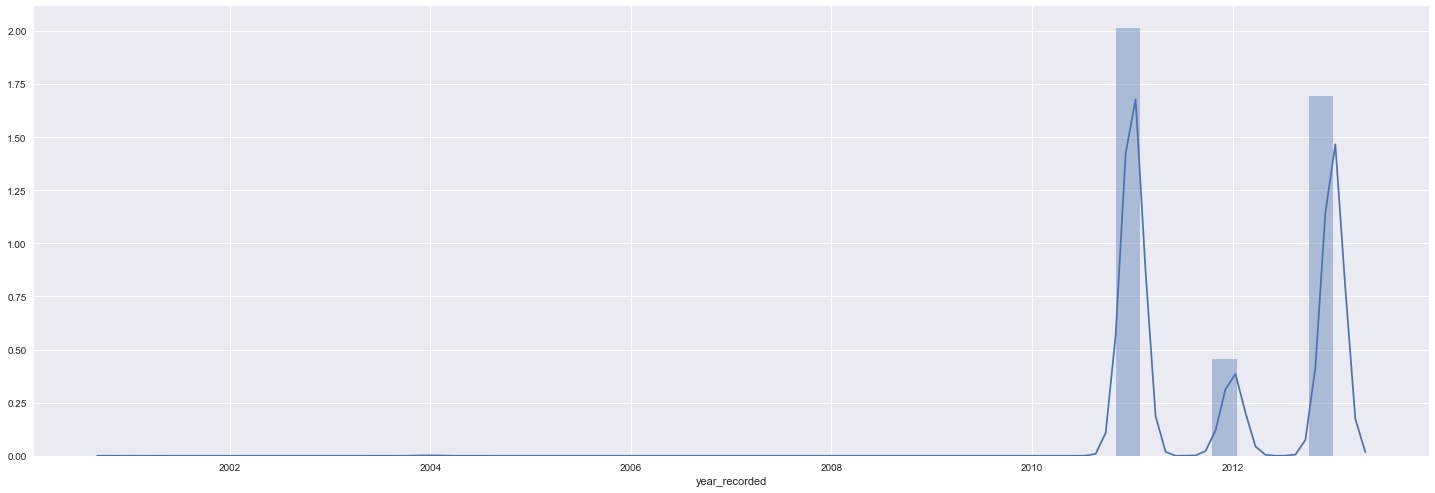

In [706]:
combined["year_recorded"]=combined.date_recorded.astype(str).str[0:4]
combined["year_recorded"]=combined["year_recorded"].astype(int)
sns.set()
sns.distplot(combined.year_recorded,kde=True)
plt.show()
combined=combined.drop("date_recorded",axis=1)

## Creating Age of the Pump

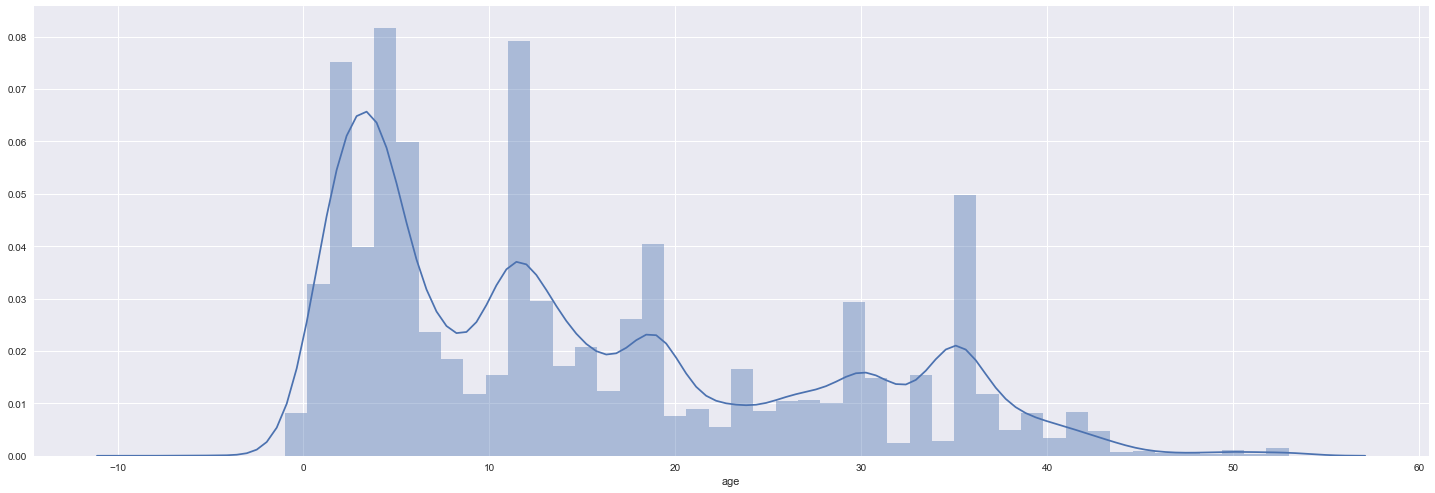

In [713]:
combined['age']=combined['year_recorded']-combined['construction_year']
sns.set()
sns.distplot(combined.age,kde=True)
plt.show()

#### We notice that the age is less than zero for some records so we transform them to zero

In [715]:
combined.loc[combined.age<=0,'age']=0

## District Code

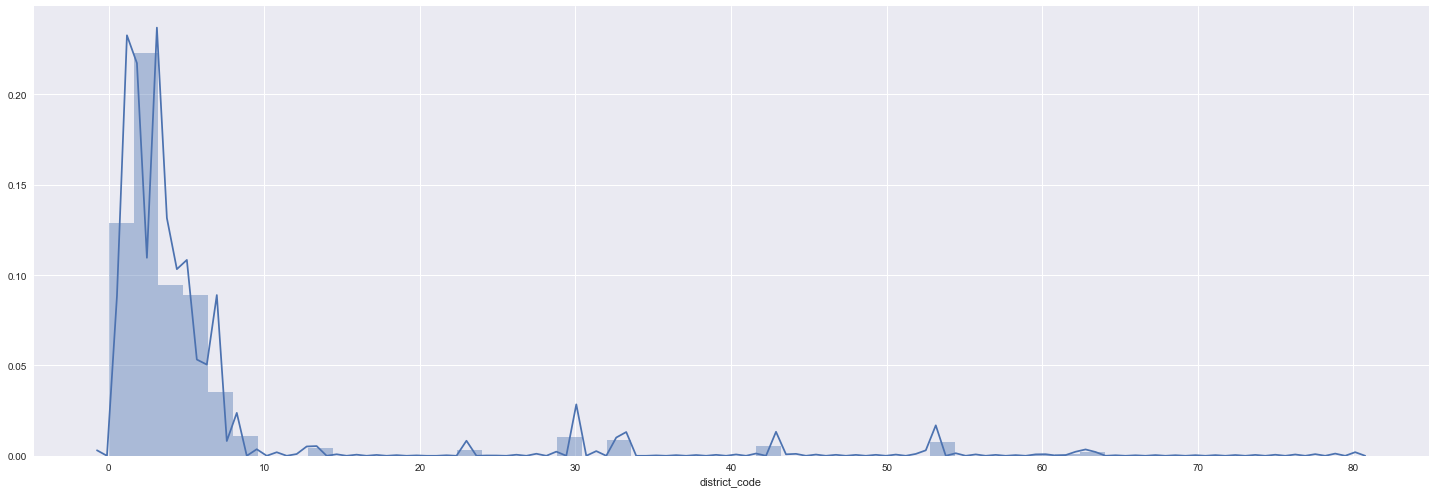

In [717]:
sns.set()
sns.distplot(combined.district_code,kde=True)
plt.show()

#### No of wells are highly skewed towards some districts. We need to transform this into categorical variable

In [718]:
combined.district_code = combined.district_code.astype(str)

## Extraction Type

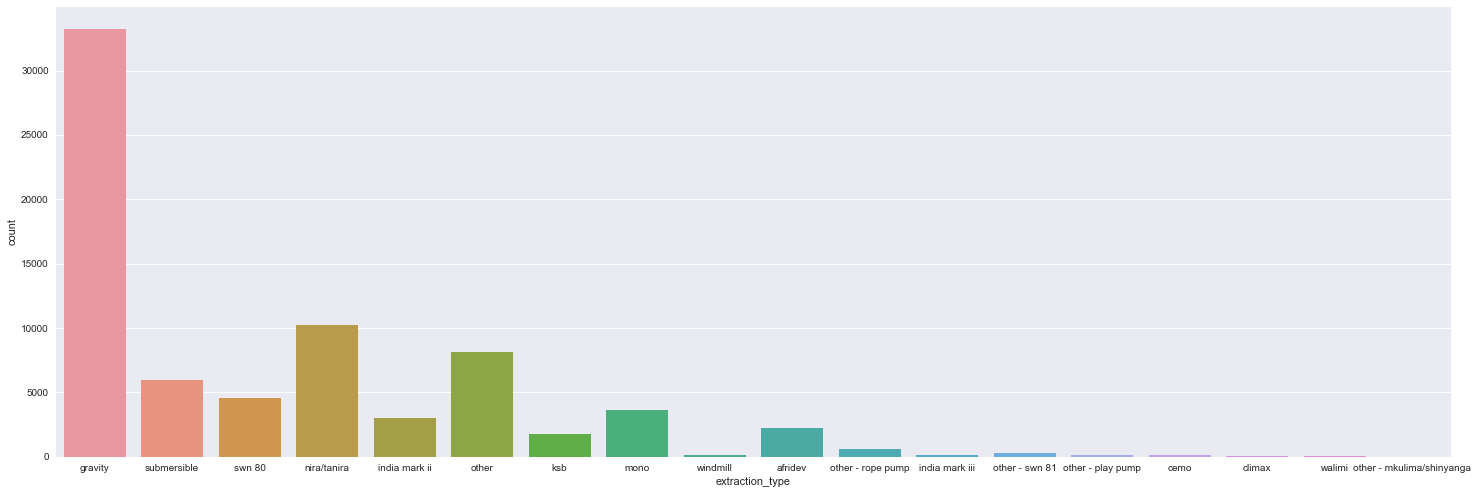

In [719]:
sns.set()
sns.countplot(combined.extraction_type)
plt.show()

#### We notice that most of the pumps are gravity based pumps

## Extraction Type - Class

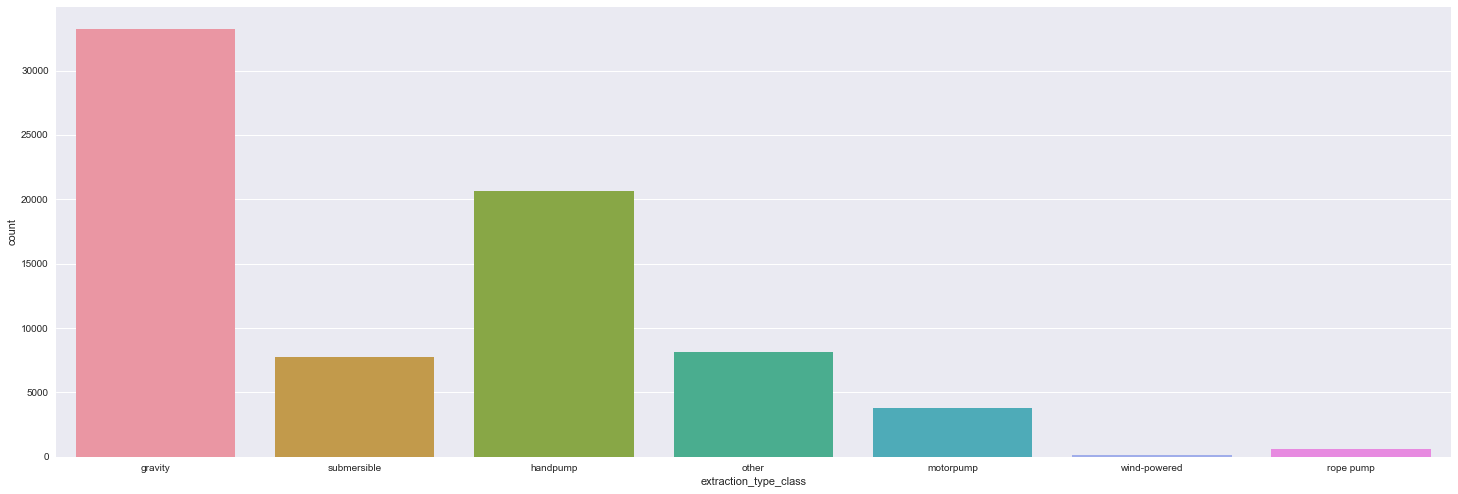

In [720]:
sns.set()
sns.countplot(combined.extraction_type_class)
plt.show()

#### This variable is very similar to extraction type so we can eliminate one of them

In [721]:
combined=combined.drop("extraction_type",axis=1)

## Extraction Type - Group

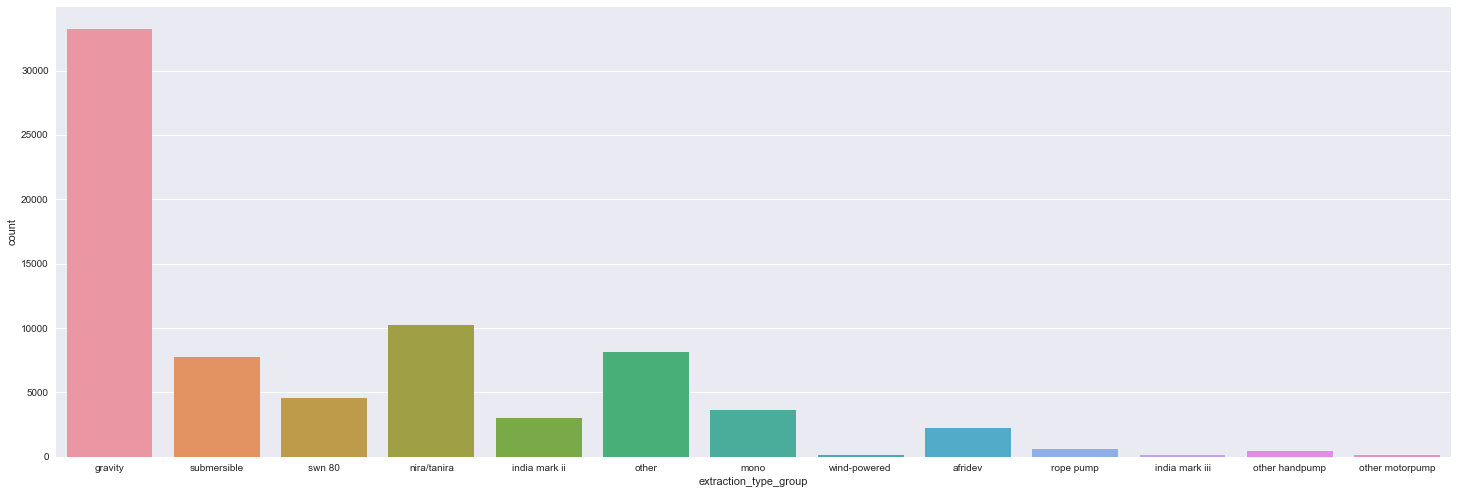

In [722]:
sns.set()
sns.countplot(combined.extraction_type_group)
plt.show()

#### Again very similar to the two variables above

In [723]:
combined=combined.drop("extraction_type_group",axis=1)

## We create a new variable to check if the funder is the same organisation as the installer and plot its distribution

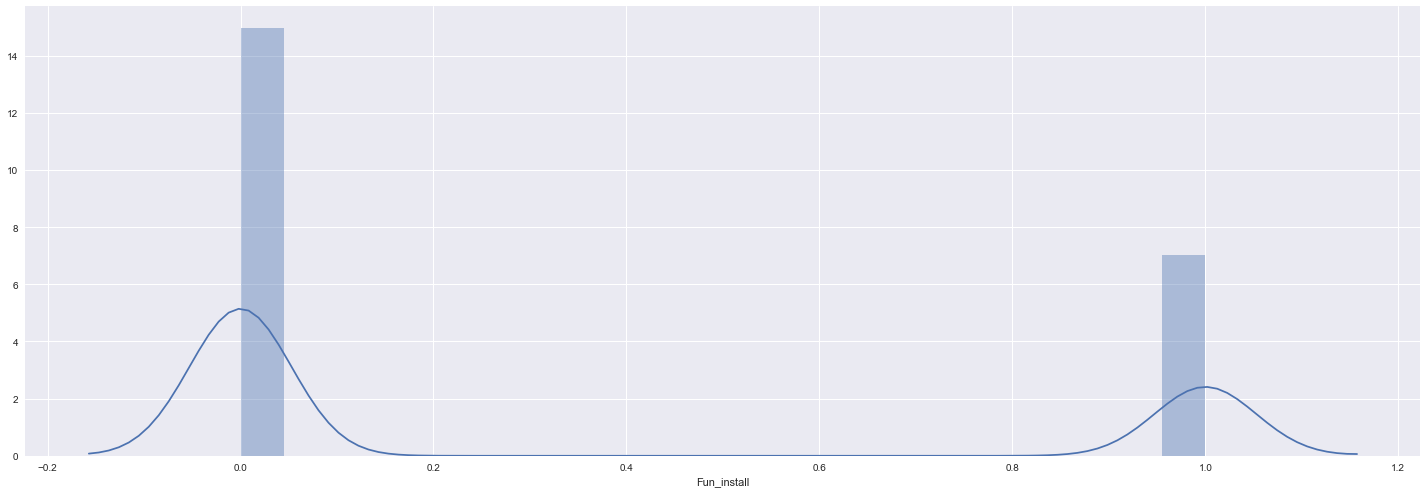

Proportion of the data points where funder and installer are the same entity is 0.319070707071


In [724]:
combined["Fun_install"]= (combined.funder.str.upper()==combined.installer.str.upper())*1
sns.set()
sns.distplot(combined.Fun_install)
plt.show()
print("Proportion of the data points where funder and installer are the same entity is",combined.Fun_install.mean())

## Lets combined categories in funder and installer to reduce dimensions

## Funder

In [725]:
combined["funder"]=combined["funder"].fillna("Others")

In [727]:
value_counts = combined.funder.value_counts()
value_counts[value_counts>500].count()

labels = value_counts.index[value_counts > 500]

print(len(labels))
combined=combined.apply(lambda x: x.mask(x.map(x.value_counts())<500, 'Others') if x.name =='funder' else x)


26


## Installer

In [728]:
combined["installer"]=combined["installer"].fillna("Others")

In [729]:
value_counts = combined.installer.value_counts()
value_counts[value_counts>500].count()

labels = value_counts.index[value_counts > 500]

print(len(labels))
combined=combined.apply(lambda x: x.mask(x.map(x.value_counts())<500, 'Others') if x.name =='installer' else x)


19


## Latitude and Longitude

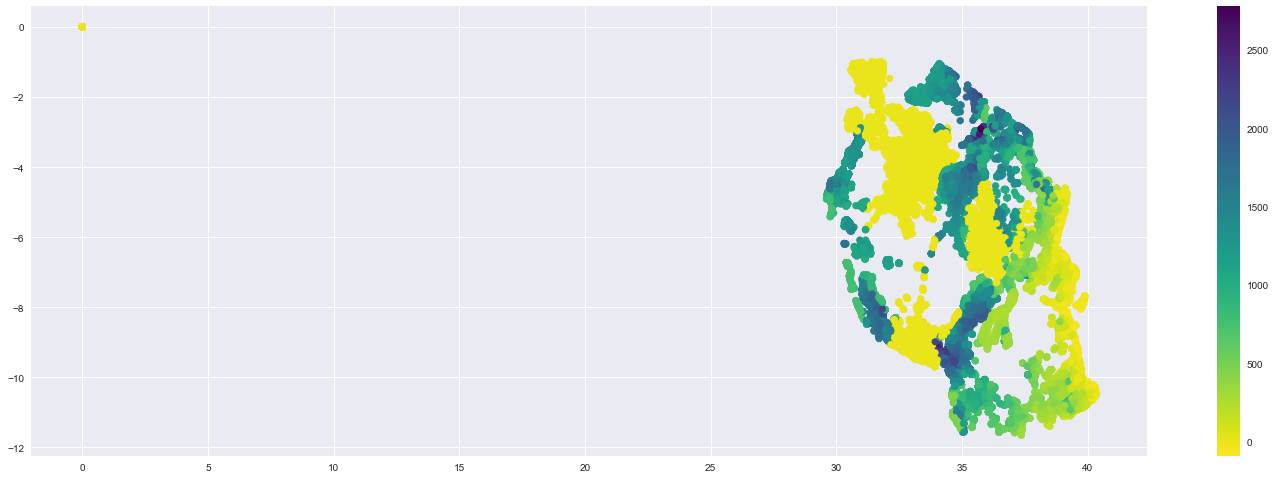

In [730]:
plt.scatter(x=combined.longitude,y=combined.latitude,c=combined.gps_height,cmap="viridis_r")
plt.colorbar()
plt.show()

### We can see a dot on the top left corner. We will need to impute these values

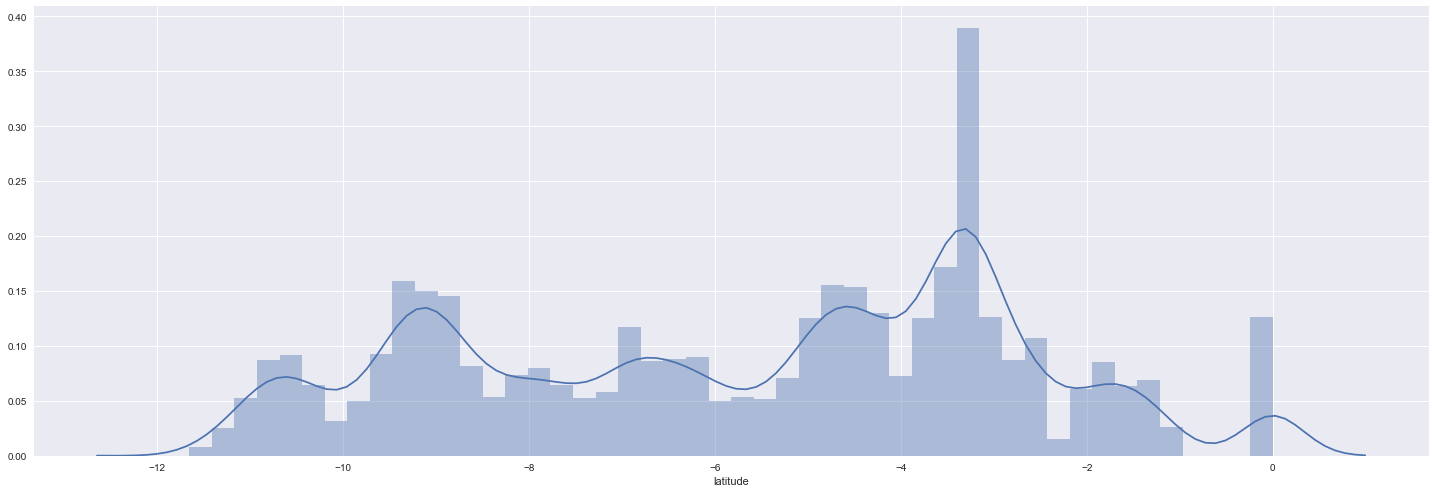

In [731]:
sns.set()
sns.distplot(combined.latitude)
plt.show()

In [732]:
print("Max latitude is",combined.latitude.max())
from collections import Counter
data = Counter(combined.latitude)
print(data.most_common(1))

Max latitude is -2e-08
[(-2e-08, 2269)]


#### The geographic bounds of latitude and longitude of Tanzania is Latitude from -11.36667 to -1.14389 and longitude from 29.62667 to 40.33333

## Imputing the value for latitude

In [733]:
combined["latitude"]=combined["latitude"].replace(-2e-08,np.nan)
df=combined[['region_code','basin','latitude']]
df=pd.get_dummies(df)
df1=df[df.latitude.notnull()]
y=df1.latitude
x=df1.drop("latitude",axis=1)
x_test=df[df.latitude.isnull()]
x_test=x_test.drop("latitude",axis=1)

ind=x_test.index

In [734]:
cy=KNeighborsRegressor(n_neighbors=5)
cy.fit(x,y)
pred=cy.predict(x_test)

In [735]:
pr=pd.Series(pred,index=ind)
combined.loc[combined.latitude.isnull(),'latitude']=pr

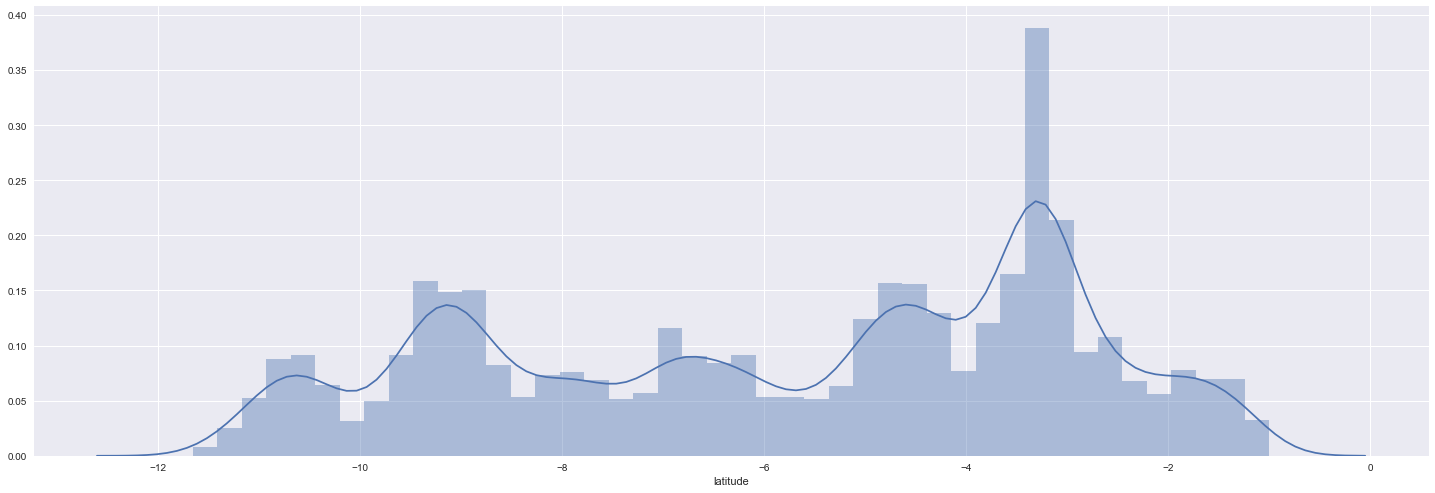

In [736]:
sns.set()
sns.distplot(combined.latitude)
plt.show()

## Longitude

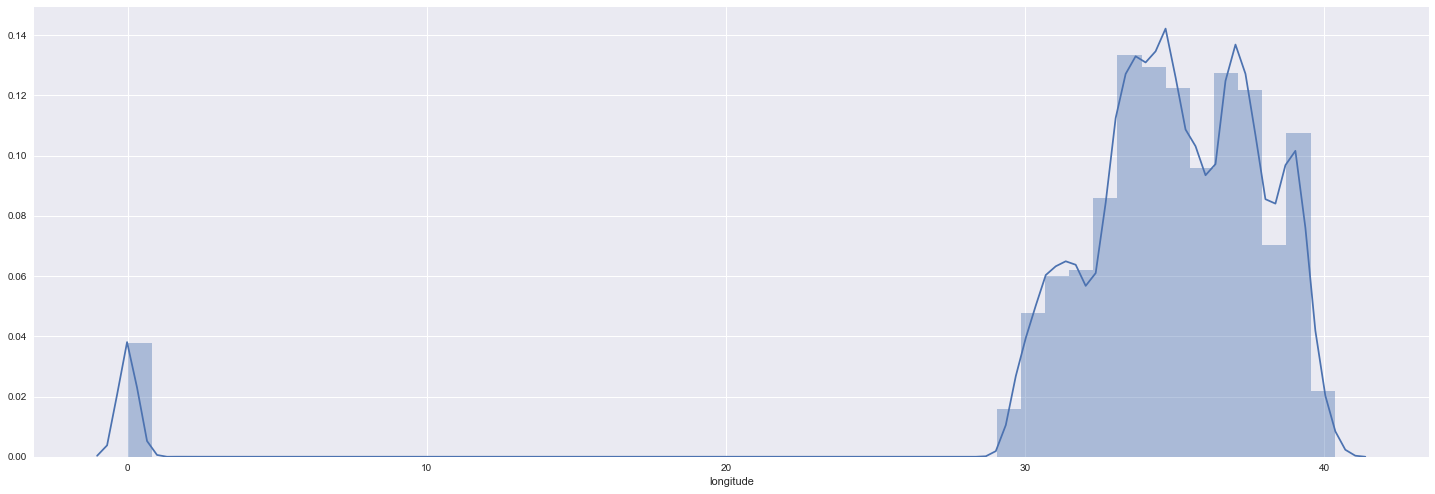

In [608]:
sns.set()
sns.distplot(combined.longitude)
plt.show()

In [737]:
print("Min longitude is",combined.longitude.min())
from collections import Counter
data = Counter(combined.longitude)
print(data.most_common(1))

Min longitude is 0.0
[(0.0, 2269)]


## Imputing Longitude

In [738]:
combined["longitude"]=combined["longitude"].replace(0,np.nan)
df=combined[['region_code','basin','longitude']]
df=pd.get_dummies(df)
df1=df[df.longitude.notnull()]
y=df1.longitude
x=df1.drop("longitude",axis=1)
x_test=df[df.longitude.isnull()]
x_test=x_test.drop("longitude",axis=1)

ind=x_test.index

In [739]:
cy=KNeighborsRegressor(n_neighbors=5)
cy.fit(x,y)
pred=cy.predict(x_test)

In [740]:
pr=pd.Series(pred,index=ind)
combined.loc[combined.longitude.isnull(),'longitude']=pr

#### We can infer that for some data points both latitude and longitude are incorrect

## GPS Height

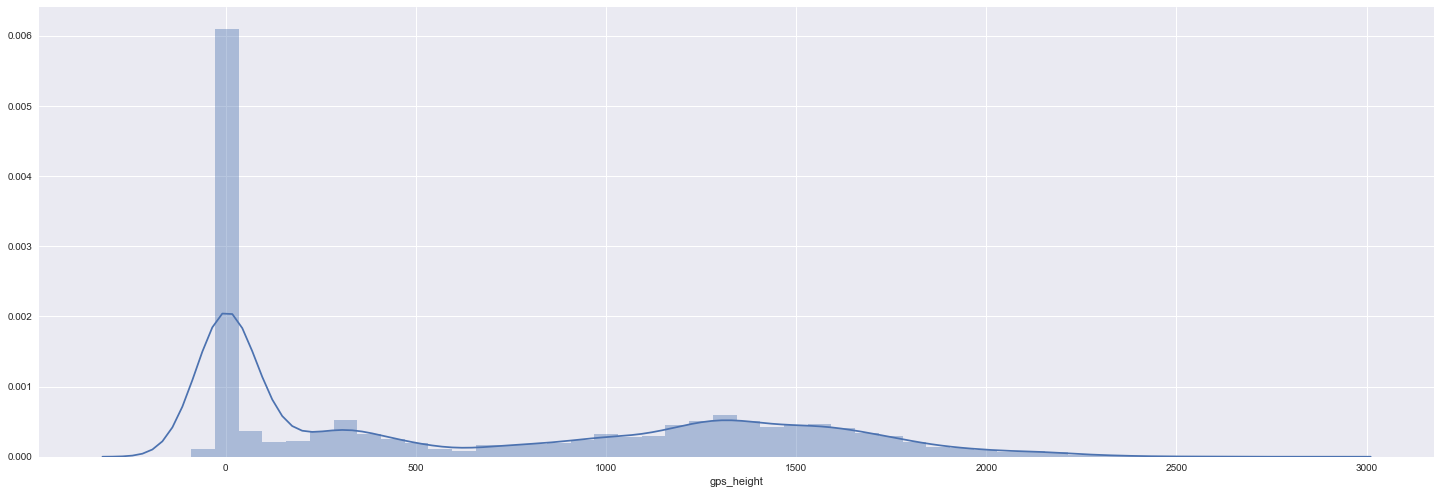

In [741]:
sns.set()
sns.distplot(combined.gps_height)
plt.show()

In [742]:
print("Point of lowest altitude is",combined.gps_height.min())
from collections import Counter
data = Counter(combined.gps_height)
print(data.most_common(1))

Point of lowest altitude is -90
[(0, 25649)]


#### A lot of wells are below sea level we will have to inspect this

## Imputing Gps_Height

In [743]:
combined.loc[combined.gps_height<=0,'gps_height']=np.nan

In [744]:
df=combined[['region_code','basin','latitude','longitude','gps_height']]
df=pd.get_dummies(df)
df1=df[df.gps_height.notnull()]
y=df1.gps_height
x=df1.drop("gps_height",axis=1)
x_test=df[df.gps_height.isnull()]
x_test=x_test.drop("gps_height",axis=1)

ind1=x_test.index

In [745]:
cy=KNeighborsRegressor(n_neighbors=5)
cy.fit(x,y)
pred=cy.predict(x_test)

In [746]:
pr=pd.Series(pred,index=ind1)
combined.loc[combined.gps_height.isnull(),'gps_height']=pr

## Management

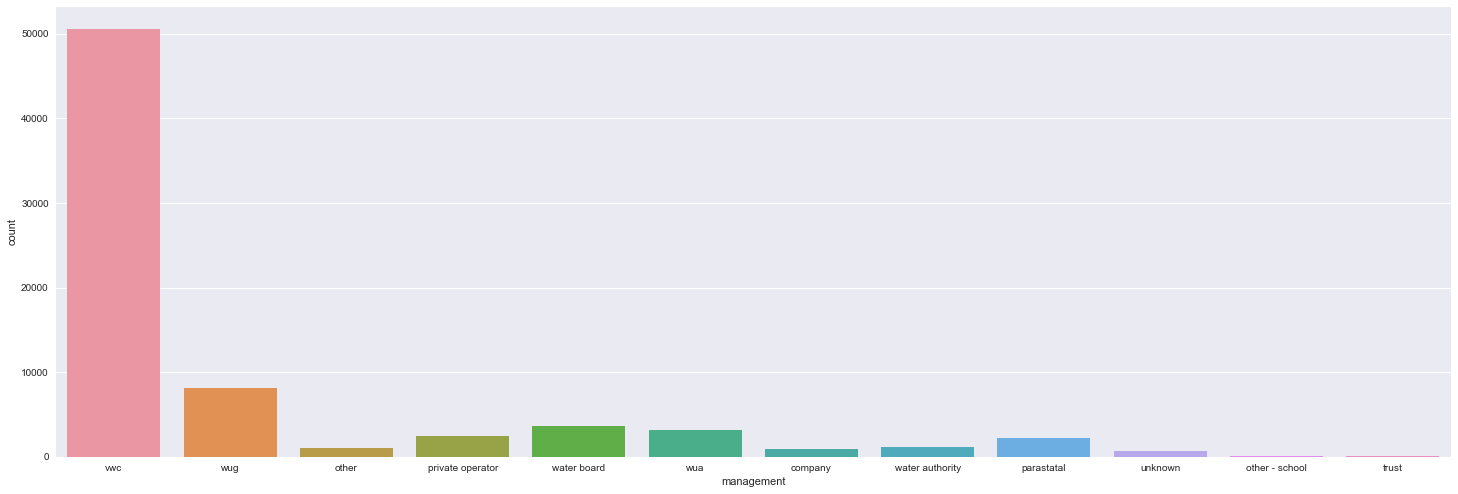

In [747]:
sns.set()
sns.countplot(combined.management)
plt.show()

### VWC looks like the biggest management firm in Tanzania

#### Binning some Categories

In [748]:
value_counts = combined.management.value_counts()
value_counts[value_counts>100].count()

labels = value_counts.index[value_counts > 100]

print((value_counts))
combined=combined.apply(lambda x: x.mask(x.map(x.value_counts())<3000, 'Others') if x.name =='management' else x)


vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64


In [749]:
value_counts = combined.management.value_counts()
value_counts

vwc            50624
Others          8712
wug             8108
water board     3688
wua             3118
Name: management, dtype: int64

## Management Group

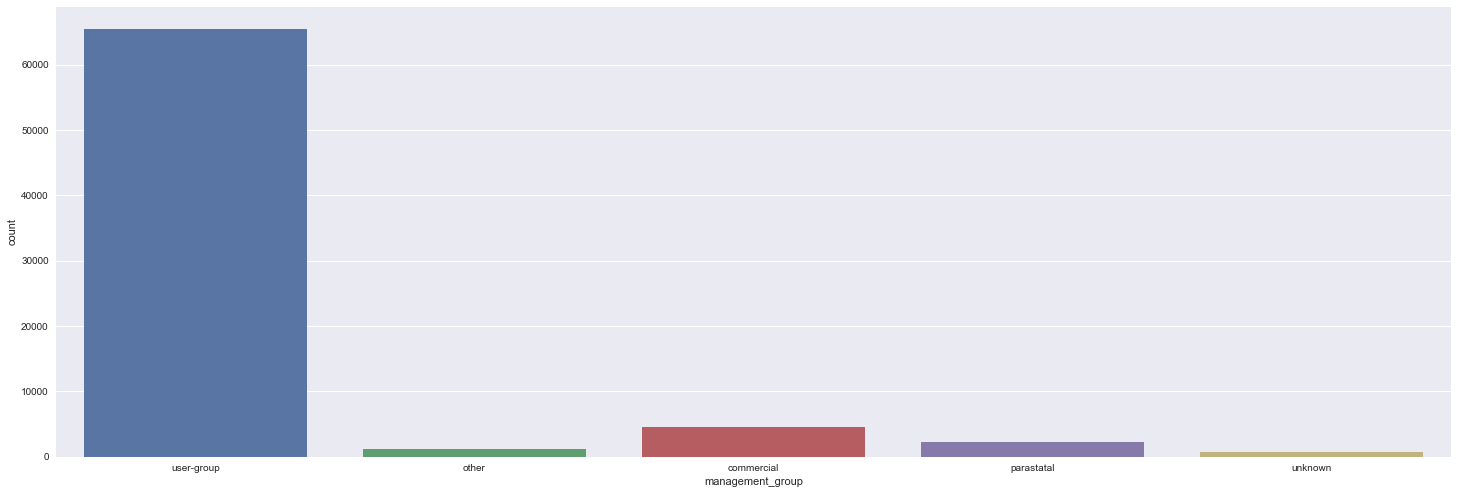

In [750]:
sns.set()
sns.countplot(combined.management_group)
plt.show()

#### User group dominates so we transform it into a boolean with respect user-group

In [751]:
combined.management_group = combined.management_group == 'user-group'

## Payment and Payment Type

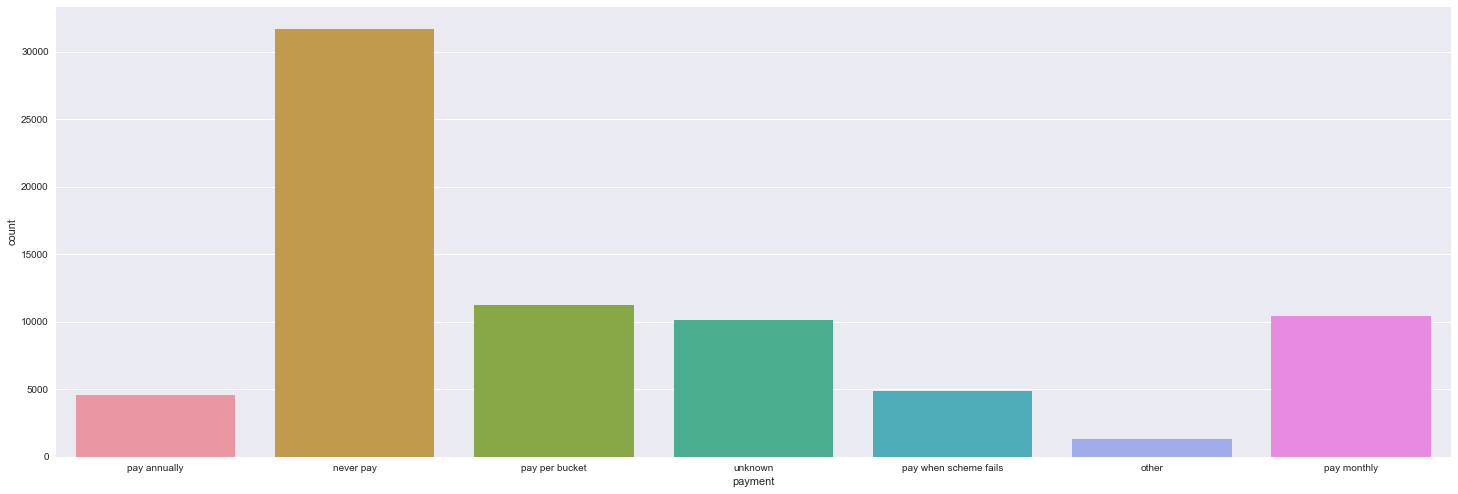

In [752]:
sns.set()
sns.countplot(combined.payment)
plt.show()

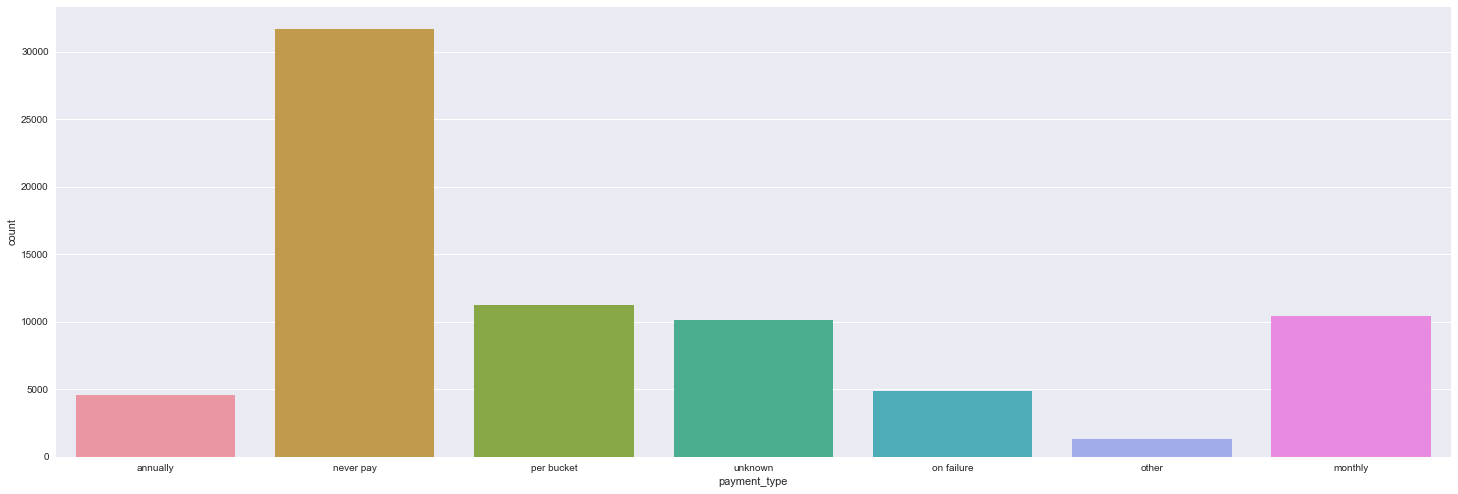

In [753]:
sns.set()
sns.countplot(combined.payment_type)
plt.show()

#### Payment and Payment Type look exactly the same so we could eliminate any one of these variables

In [754]:
combined=combined.drop("payment_type",axis=1)

## Permit

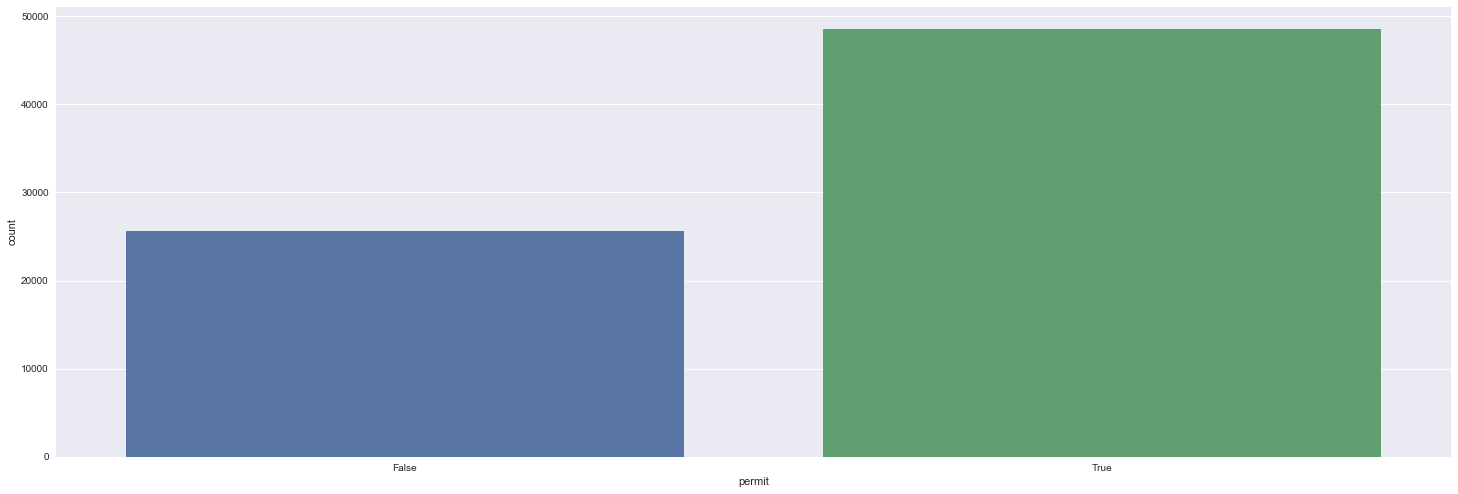

In [757]:
sns.set()
sns.countplot(combined.permit)
plt.show()

#### More than 20K pumps are without permit

### Impute NA as False

In [756]:
combined.permit=combined.permit.fillna(False)

## Population

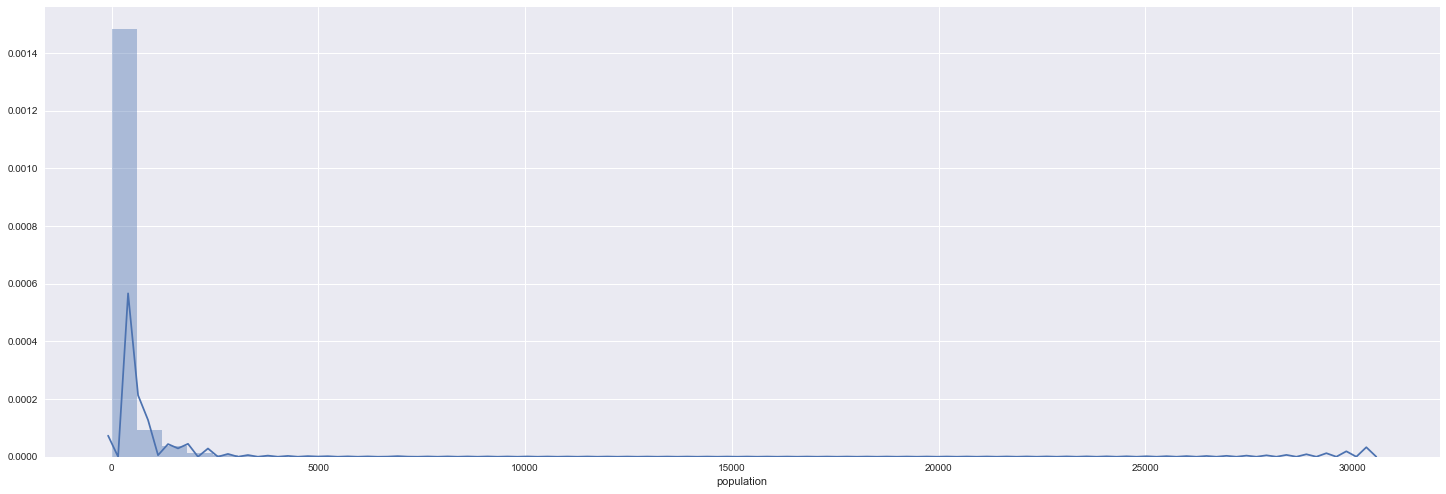

In [763]:
sns.set()
sns.distplot(combined.population)
plt.show()

In [766]:
data = Counter(combined.population)
print(data.most_common(1))

[(1.0, 11859)]


#### Approximately 27K wells have zero surrounding population this has to be an error so we need to fix this

In [760]:
combined["population"]=combined["population"].replace(0,np.nan)
df=combined[['region_code','basin','latitude','longitude','population']]
df=pd.get_dummies(df)
df1=df[df.population.notnull()]
y=df1.population
x=df1.drop("population",axis=1)
x_test=df[df.population.isnull()]
x_test=x_test.drop("population",axis=1)

ind=x_test.index

In [761]:
cy=KNeighborsRegressor(n_neighbors=5)
cy.fit(x,y)
pred=cy.predict(x_test)

In [762]:
pr=pd.Series(pred,index=ind)
combined.loc[combined.population.isnull(),'population']=pr

## Public Meeting

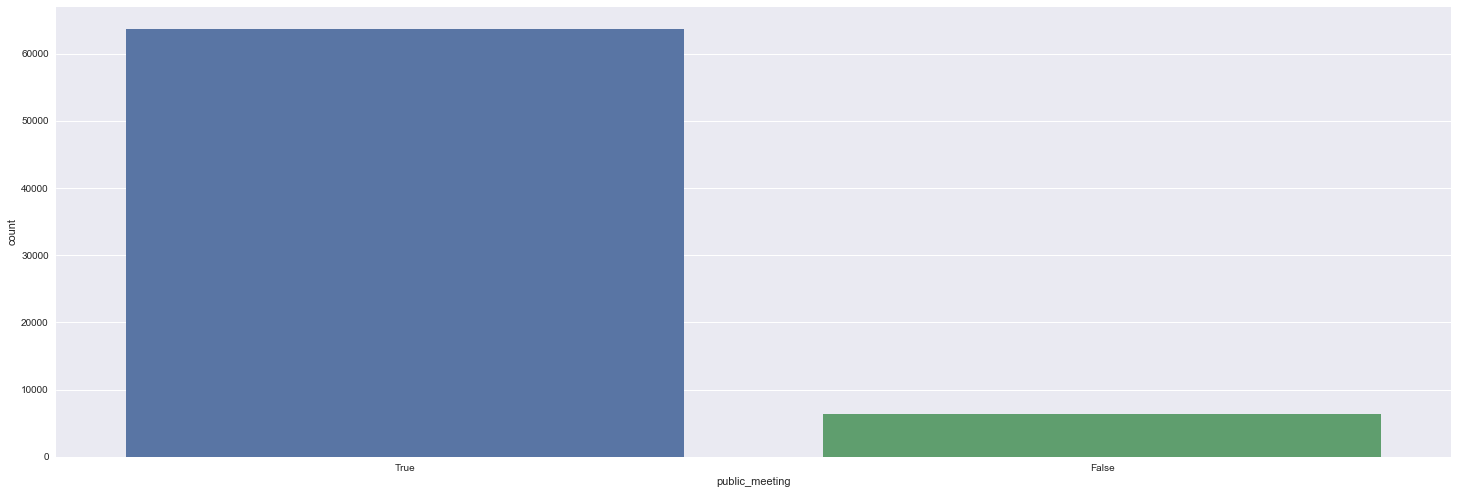

In [767]:
sns.set()
sns.countplot(combined.public_meeting)
plt.show()

#### There is no description of this variable so there is very little we could do with it

In [768]:
combined["public_meeting"]=combined["public_meeting"].fillna(False)

## Quality Group and Water Quality

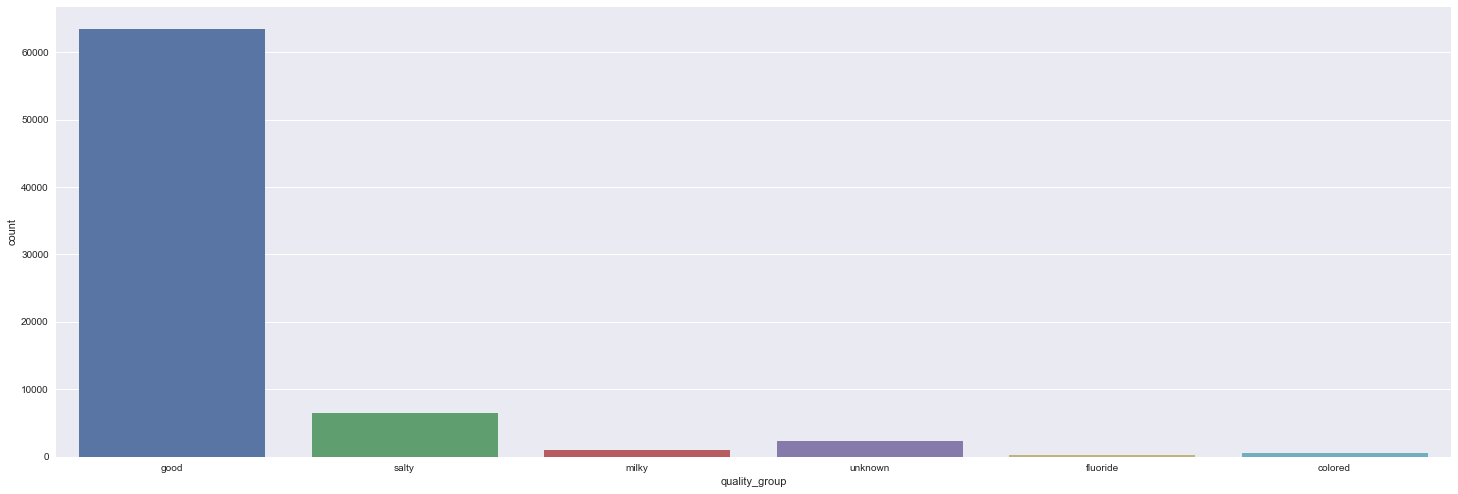

In [769]:
sns.set()
sns.countplot(combined.quality_group)
plt.show()

#### Most of the wells are in good condition and we don't see any reason to convert it into an ordinal variable as the quality does not affect functionality in an ordinal manner

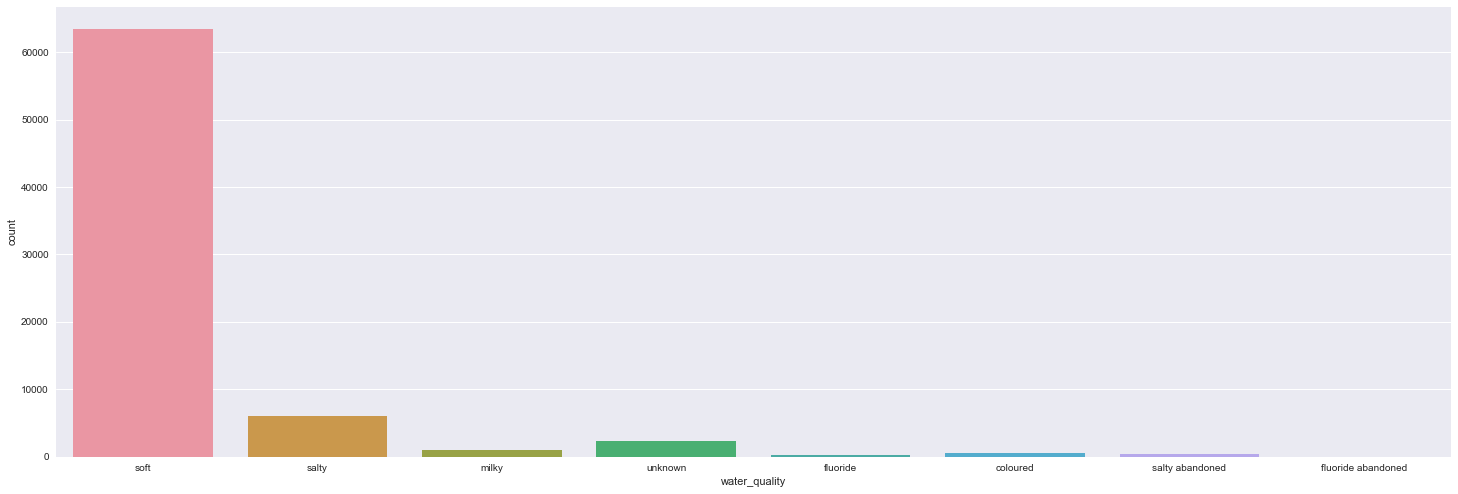

In [770]:
sns.set()
sns.countplot(combined.water_quality)
plt.show()

#### There is a huge overlap between these two variables so we have to drop one of them

In [771]:
combined=combined.drop("water_quality",axis=1)

### Creating a boolean based on soft water

In [773]:
combined.quality_group = combined.quality_group == 'good'

## Quantity and Quantity Group

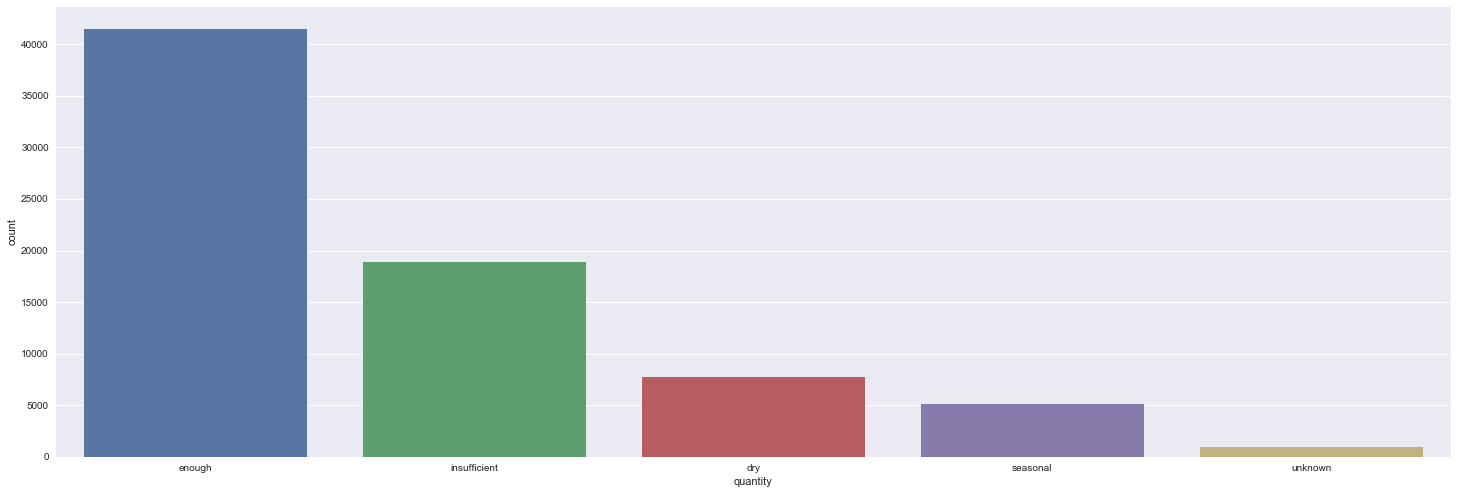

In [774]:
sns.set()
sns.countplot(combined.quantity)
plt.show()

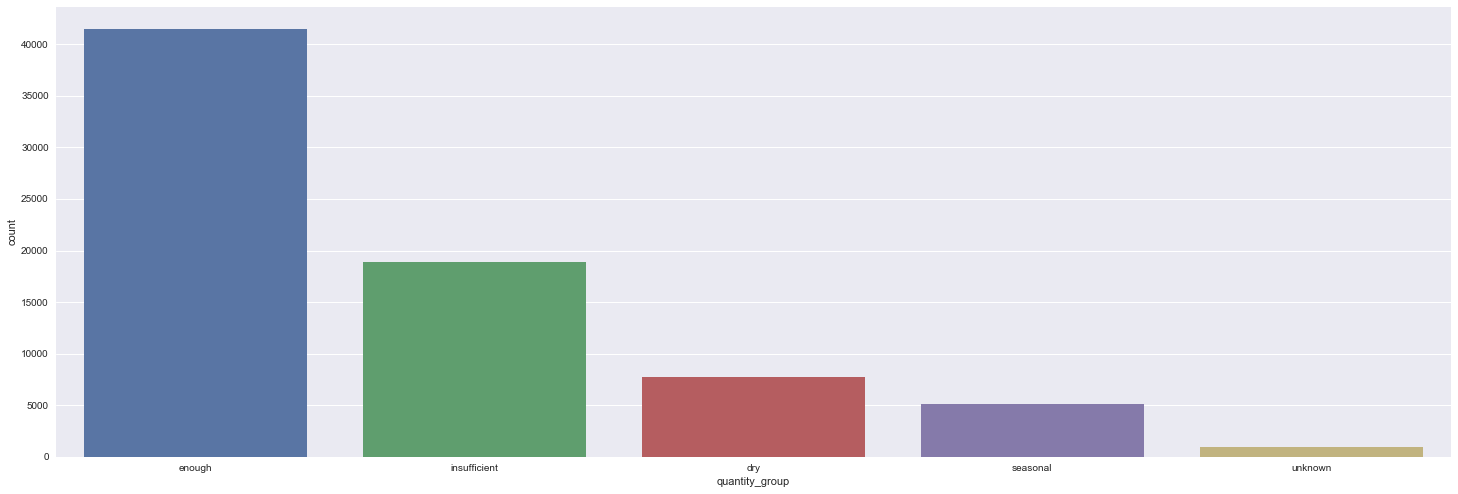

In [775]:
sns.set()
sns.countplot(combined.quantity_group)
plt.show()

#### Both these variables are almost similar so we could eliminate one of them 

In [776]:
combined=combined.drop("quantity_group",axis=1)

## Region and Region Code

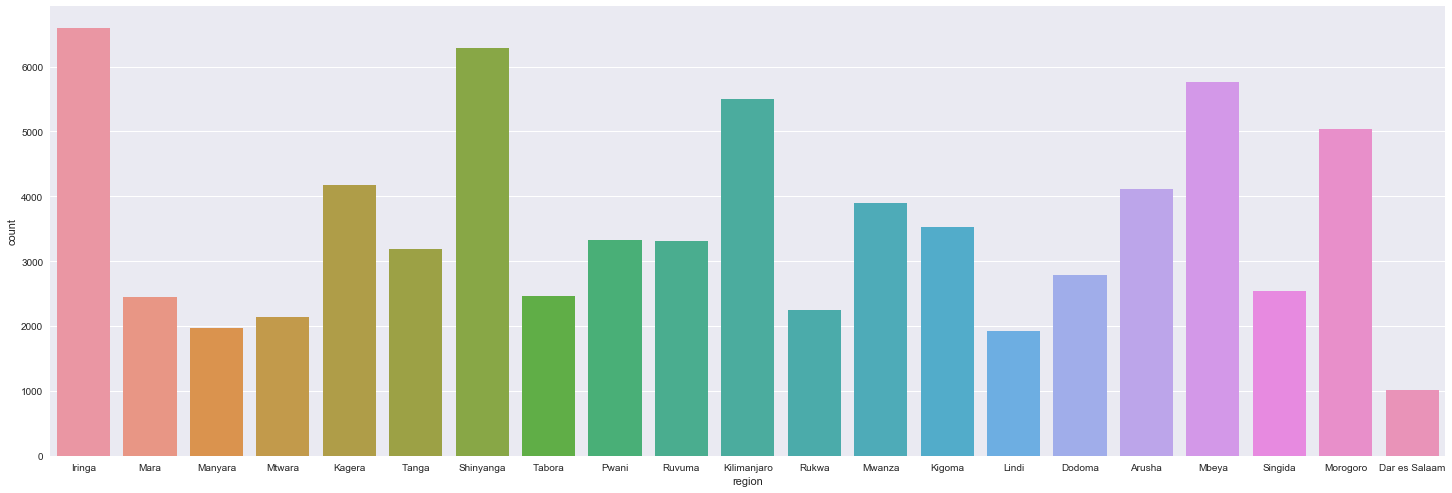

In [777]:
sns.set()
sns.countplot(combined.region)
plt.show()

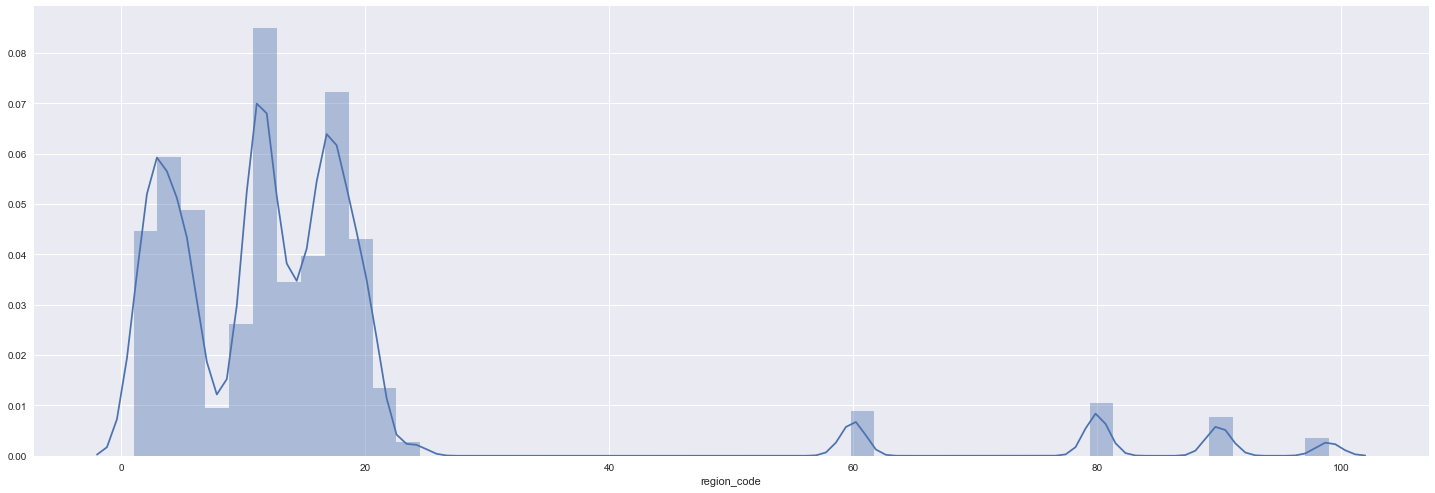

In [778]:
sns.set()
sns.distplot(combined.region_code)
plt.show()

#### We were expecting these two to be similar but since the number of unique values for region and region code are different, it means that a region can have areas with different code. We decide to convert region code to categorical/string

In [779]:
combined.region_code = combined.region_code.astype(str)

## Scheme Management

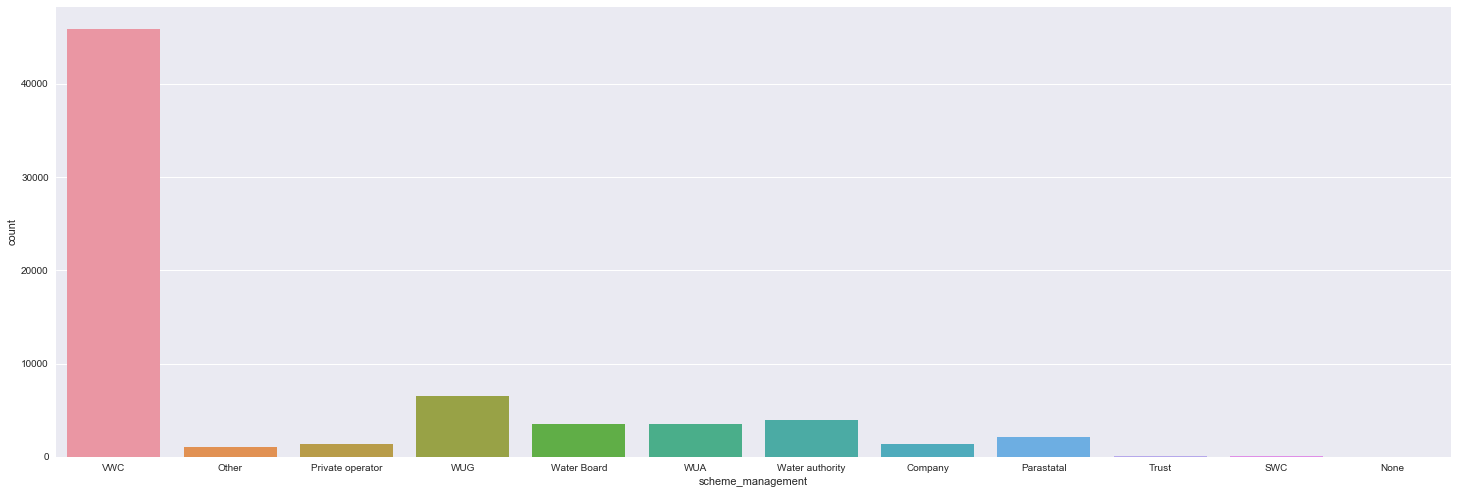

In [780]:
sns.set()
sns.countplot(combined.scheme_management)
plt.show()

#### Looks like this is somewhat similar to management group so we will remove this variable

In [781]:
combined=combined.drop("scheme_management",axis=1)

## Source

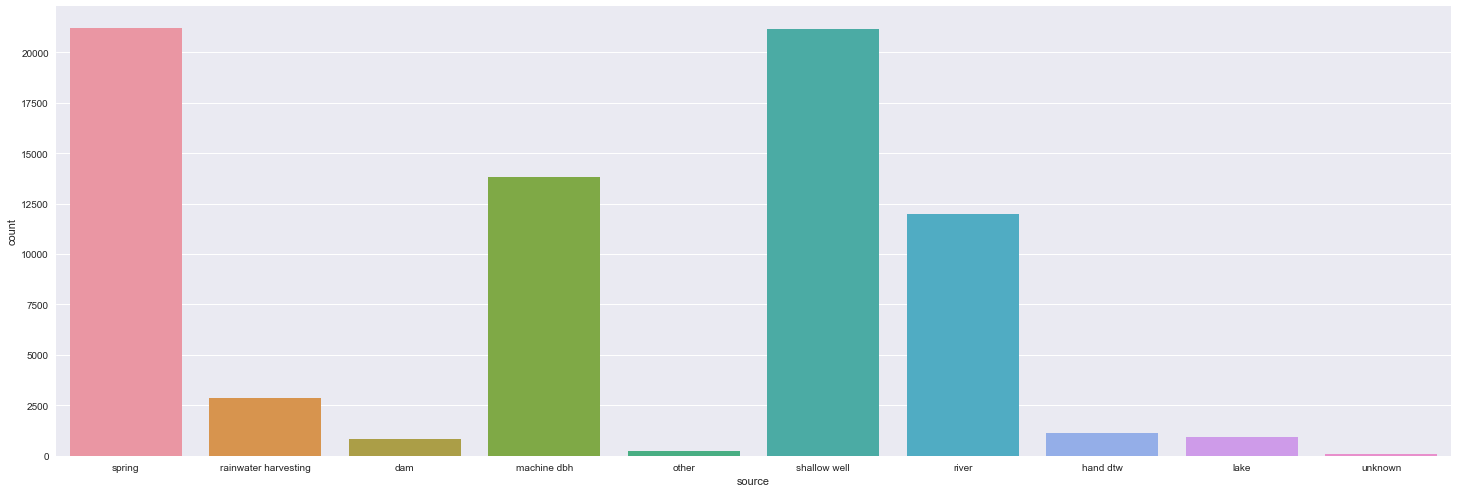

In [782]:
sns.set()
sns.countplot(combined.source)
plt.show()

#### We believe that source type unknown is different from others but we will also try merging them to see if it improves the accuracy of our model

## Source Class

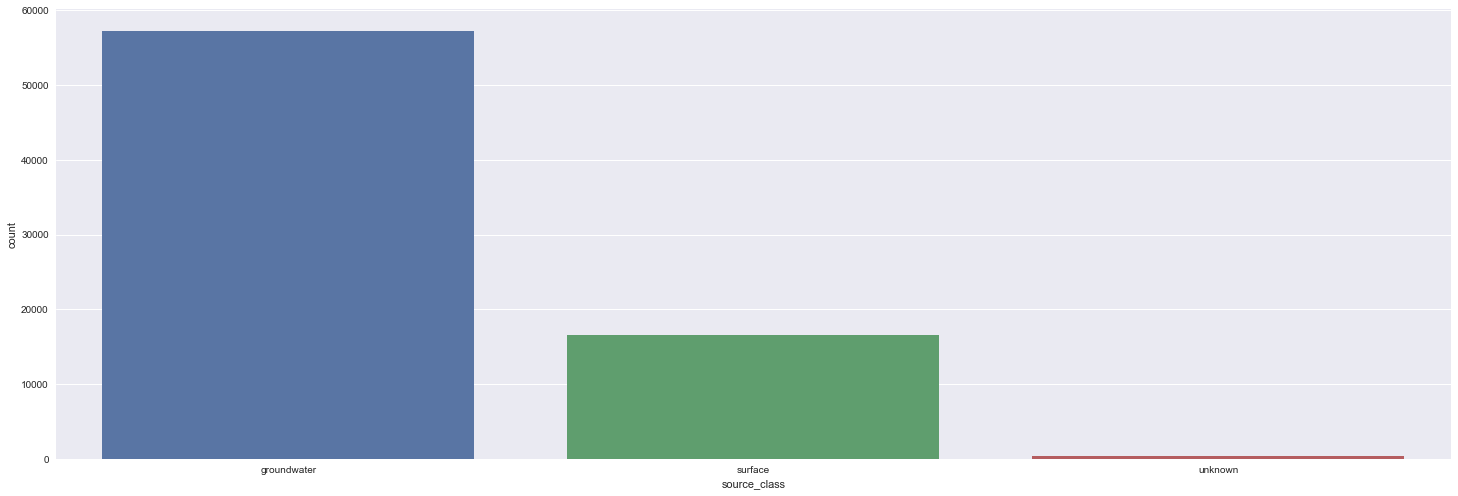

In [783]:
sns.set()
sns.countplot(combined.source_class)
plt.show()

## Source Type

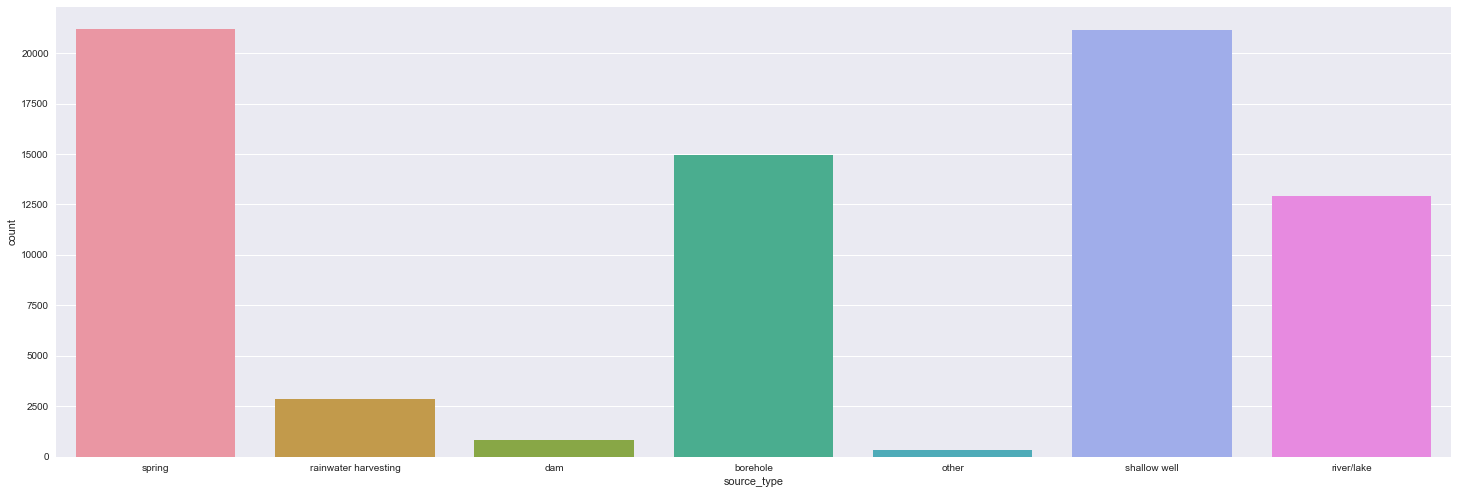

In [784]:
sns.set()
sns.countplot(combined.source_type)
plt.show()

#### We could impute unknown in source using this variable as it is very much similar to it

#### We remove source type as it is very similar to source

In [785]:
combined=combined.drop("source_type",axis=1)

## WaterPoint Type and Group

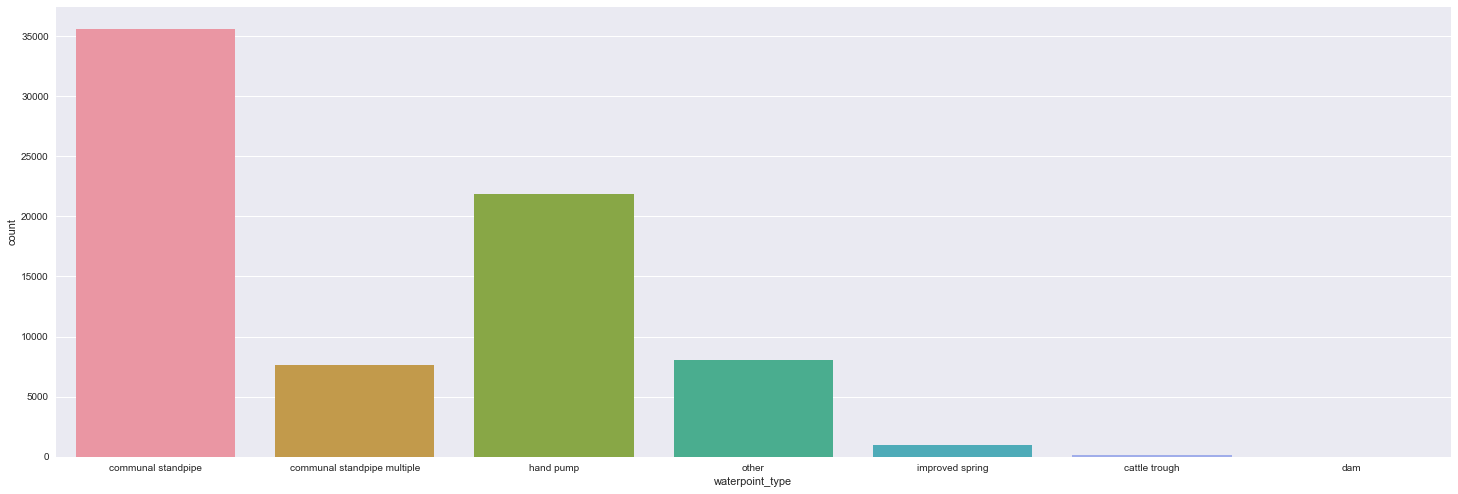

In [786]:
sns.set()
sns.countplot(combined.waterpoint_type)
plt.show()

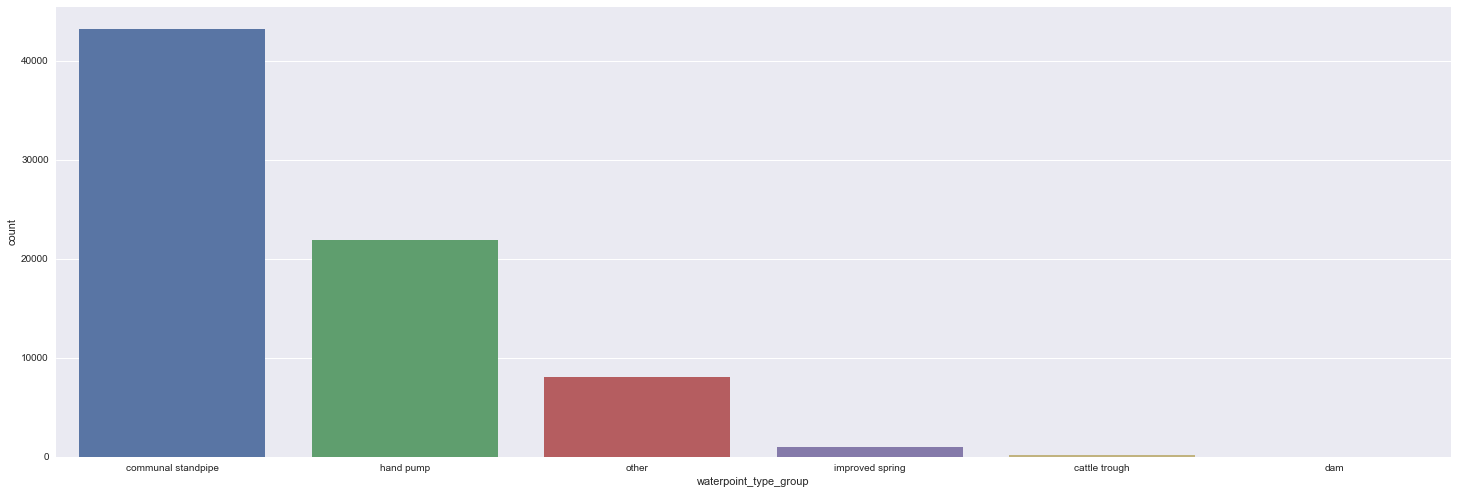

In [787]:
sns.set()
sns.countplot(combined.waterpoint_type_group)
plt.show()

#### Very high similarity between so we drop one of them

In [788]:
combined=combined.drop("waterpoint_type",axis=1)

### Imputing NA for Subvillage

In [789]:
combined.subvillage=combined.subvillage.fillna("Others")

### Binning SubVillage

In [790]:
value_counts = combined.subvillage.value_counts()
value_counts[value_counts>100].count()

labels = value_counts.index[value_counts > 100]


combined=combined.apply(lambda x: x.mask(x.map(x.value_counts())<200, 'Others') if x.name =='subvillage' else x)
print(combined.subvillage.value_counts())

Others      70593
Shuleni       646
Majengo       631
Madukani      629
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Name: subvillage, dtype: int64


### Imputing NAs for Scheme Name

In [791]:
combined.scheme_name=combined.scheme_name.fillna("Others")

### Binning Scheme Name

In [792]:
value_counts = combined.scheme_name.value_counts()
value_counts[value_counts>100].count()

labels = value_counts.index[value_counts > 100]


combined=combined.apply(lambda x: x.mask(x.map(x.value_counts())<200, 'Others') if x.name =='scheme_name' else x)
print(combined.scheme_name.value_counts())

Others                                   66902
K                                          858
None                                       794
Borehole                                   704
Chalinze wate                              501
M                                          490
DANIDA                                     483
Government                                 395
Ngana water supplied scheme                335
wanging'ombe water supply s                323
Bagamoyo wate                              296
wanging'ombe supply scheme                 284
I                                          281
Uroki-Bomang'ombe water sup                266
N                                          258
Kirua kahe gravity water supply trust      237
Machumba estate pipe line                  225
Makwale water supplied sche                209
Kijiji                                     205
Handeni Trunk Main(H                       204
Name: scheme_name, dtype: int64


### Checking NAs

In [793]:
df_na=combined.isnull().sum()
print("There are",df_na[df_na!=0].count(),"columns with missing values listed below")
df_na[df_na!=0].sort_values(ascending=False)

There are 1 columns with missing values listed below


status_group    14850
dtype: int64

## Creating Dummies and removing some variables that we consider not important

In [794]:
features=combined.drop(['wpt_name','lga','ward','status_group'],axis=1)
features=pd.get_dummies(features)
len(features.columns)

210

## Splitting Training and Test Set

In [795]:
train=features[:59400]
train.shape

test=features[59400:]
labels_train=combined.status_group[:59400]

## Creating the dataset for XgBoost

In [796]:
dtrain=pd.concat([train,combined.status_group[:59400]],axis=1)
dtrain = dtrain.replace({"status_group" : {"functional" : 0,"non functional":1, "functional needs repair" : 2}})


## Random Forest model

In [797]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42,max_features=.7,max_depth=20)
rf.fit(train,labels_train)

CPU times: user 6min 34s, sys: 1.59 s, total: 6min 36s
Wall time: 6min 37s


## Printing the metrics

In [798]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#train_y, trained_model.predict(train_x)
print(accuracy_score(labels_train,rf.predict(train)))
confusion_matrix(labels_train,rf.predict(train))

0.935067340067


array([[32018,    46,   195],
       [ 1249,  2921,   147],
       [ 2192,    28, 20604]])

In [799]:
%%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train, labels_train, cv = 5)
print(scores)

[ 0.81180035  0.80531942  0.80757576  0.80286195  0.8064489 ]
CPU times: user 25min 46s, sys: 7.78 s, total: 25min 54s
Wall time: 26min 1s


In [800]:
scores.mean(),scores.std()

(0.80680127572429594, 0.0029471660870212051)

##### Random Forest gave us a score of 0.8150 on the leaderboards

## XGBoost

In [417]:
from xgboost import XGBClassifier
import xgboost as xgb

/Users/anchaljaiswal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Creating a function to run XGBoost

In [418]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain["status_group"].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['status_group'],eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.6g" % metrics.accuracy_score(dtrain['status_group'].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()


### Trying an XGBoost model with arbitarary parameters which we will tune later


Model Report
Accuracy : 0.738266


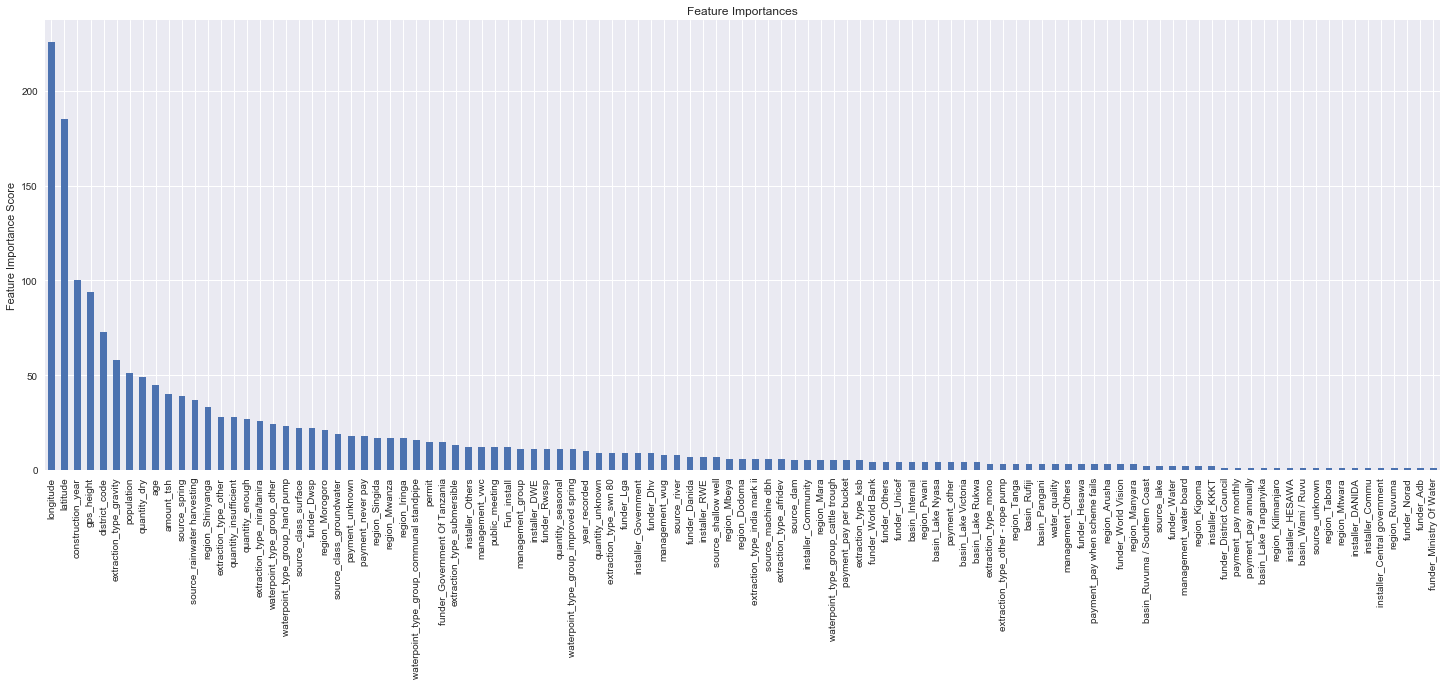

CPU times: user 1min 9s, sys: 1.48 s, total: 1min 10s
Wall time: 1min 11s


In [424]:
%%time
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

predictors = features.columns
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=20,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=8,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, dtrain, predictors)


### Tuning number of estimators, min child weight and max depth

In [ ]:
%%time
param_test1 = {
 'n_estimators': [400,500,600,700,800,900,1000]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(dtrain[predictors],dtrain["status_group"])
print(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

In [426]:
print(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

[mean: 0.77049, std: 0.00383, params: {'n_estimators': 100}, mean: 0.78379, std: 0.00305, params: {'n_estimators': 200}, mean: 0.79108, std: 0.00211, params: {'n_estimators': 300}, mean: 0.79433, std: 0.00221, params: {'n_estimators': 400}, mean: 0.79990, std: 0.00231, params: {'n_estimators': 600}, mean: 0.80350, std: 0.00241, params: {'n_estimators': 800}, mean: 0.80512, std: 0.00244, params: {'n_estimators': 1000}] {'n_estimators': 1000} 0.8051177966872576


##### We select the number of estimators as 800

In [428]:
%%time
param_test1 = {
 'max_depth':[3,5,6,8,9],
 'min_child_weight':[1,3,4,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=800, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(dtrain[predictors],dtrain["status_group"])
print(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

[mean: 0.78311, std: 0.00147, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.78322, std: 0.00217, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.78281, std: 0.00170, params: {'max_depth': 3, 'min_child_weight': 4}, mean: 0.78215, std: 0.00221, params: {'max_depth': 3, 'min_child_weight': 6}, mean: 0.80350, std: 0.00241, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.80143, std: 0.00212, params: {'max_depth': 5, 'min_child_weight': 3}, mean: 0.80199, std: 0.00220, params: {'max_depth': 5, 'min_child_weight': 4}, mean: 0.80045, std: 0.00193, params: {'max_depth': 5, 'min_child_weight': 6}, mean: 0.80796, std: 0.00289, params: {'max_depth': 6, 'min_child_weight': 1}, mean: 0.80756, std: 0.00233, params: {'max_depth': 6, 'min_child_weight': 3}, mean: 0.80663, std: 0.00277, params: {'max_depth': 6, 'min_child_weight': 4}, mean: 0.80620, std: 0.00273, params: {'max_depth': 6, 'min_child_weight': 6}, mean: 0.80970, std: 0.00371, params: {'max_depth': 8, 'min_chil

##### We select max depth as 8 and min child weight as 3

## Training the XGBoost Model after tuning


Model Report
Accuracy : 0.881869


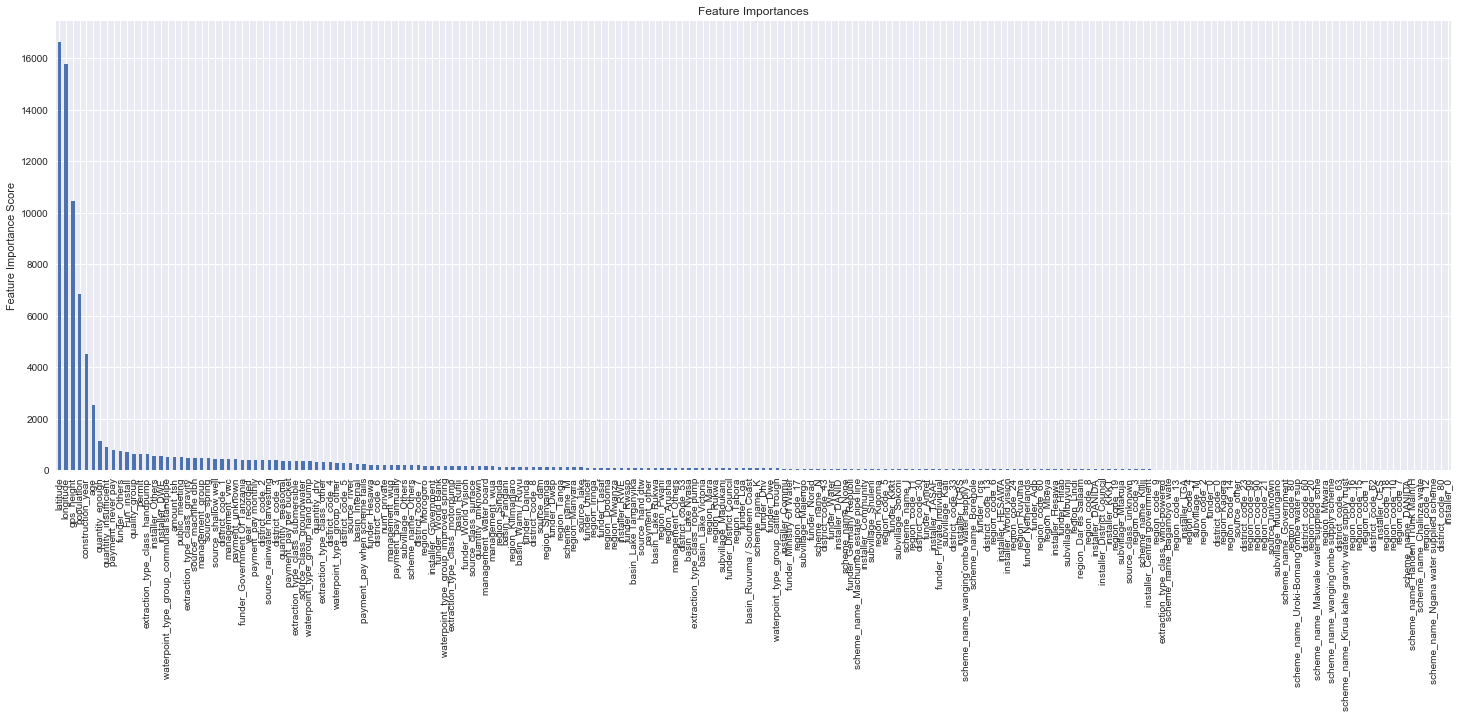

CPU times: user 49min 59s, sys: 11.7 s, total: 50min 11s
Wall time: 50min 22s


In [802]:
%%time
predictors = features.columns
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=800,
 max_depth=8,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=8,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, dtrain, predictors)

##### After Tuning XGBoost we got a score of 0.8147 on the leaderboard

## Extra Tree Classifier

In [832]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10)
y_train=dtrain['status_group']
X_train=dtrain.drop("status_group",axis=1)
ETC.fit(X_train, y_train)
print(accuracy_score(y_train,ETC.predict(X_train)))
confusion_matrix(y_train,ETC.predict(X_train))

0.903148148148
CPU times: user 3min 49s, sys: 3.68 s, total: 3min 53s
Wall time: 3min 54s


### Cross validation on ETC

In [834]:
%%time
scores = cross_val_score(ETC, X_train, y_train, cv = 5)
print(scores)

[ 0.8085178   0.80304688  0.8030303   0.80151515  0.805607  ]
CPU times: user 12min 5s, sys: 15.5 s, total: 12min 20s
Wall time: 12min 26s


##### This simple Extra Trees Classifier gave us a score of 0.8155

## Stacking XGBoost on top of Random Forest and Extra Tree Classifier

#### Creating a function to run the models 

In [807]:
from sklearn.cross_validation import KFold
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

### Out of Fold Predictions -  We will use these as the new features for the meta model

In [808]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


### Base Model

In [809]:
rf_params= {'n_estimators' : 500, 'max_features':.7,'max_depth':20}
etc_params= {'n_estimators':1000,'min_samples_split':10}

In [810]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
etc= SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=rf_params)

### Creating arrays out of train and test set

In [811]:
y_train = dtrain['status_group'].ravel()
train = dtrain.drop(['status_group'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

### Output of First Level predictions

#### Random Forest

In [812]:
%%time
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test)

CPU times: user 30min 46s, sys: 6.95 s, total: 30min 53s
Wall time: 31min


#### Extra Tree Classifier

In [813]:
%%time
etc_oof_train, etc_oof_test = get_oof(etc,x_train, y_train, x_test)

CPU times: user 45min 46s, sys: 17.6 s, total: 46min 4s
Wall time: 46min 18s


### Using First level Predictions as features

### Creating train/test split for the second level model

In [814]:
x_train = np.concatenate(( etc_oof_train, rf_oof_train), axis=1)
x_test = np.concatenate(( etc_oof_test, rf_oof_test), axis=1)

### Second Level Mode: XGBoost

In [815]:
%%time
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=800,
 max_depth=8,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=8,
 scale_pos_weight=1,
 seed=27).fit(x_train, y_train)
predictions = xgb2.predict(x_test)

CPU times: user 14.3 s, sys: 105 ms, total: 14.4 s
Wall time: 14.5 s


### This gave us a score of 0.8100 on the leaderboard so we finally decided to go with the Extra Trees Classifier model

## Submission

In [833]:
pred=ETC.predict(test)
pred=pred.astype(str)
pred[pred=='0']="functional"
pred[pred=='1']="non functional"
pred[pred=='2']="functional needs repair"
print(pred)
sub = pd.DataFrame()
sub['Id'] = test1["id"]
sub['status_group'] = pred
sub.to_csv('Final.csv',index=False)

['functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


### Some ways to improve our score:

1. More Feature Engineering and another intelligent approach of imputing the null/ incorrect values

2. Fixing Typos - Since we already binned most categories into others we might not need this step but we could definitely try this and see if any category count increases significantly. We tried using the fuzzywuzzy library of python that tells us the percentage by which two words match using Levenshtein distance but it was too slow so we had to omit that step

3. More fine tuning of hyperparameters for all of our models




##### End of Code